
<a class="anchor" id="Integration">
    
# 1.Data Integration 


</a>


- 1.1 Import the libraries. <br>
- 1.2 Loading the csv files. <br>

### 1.1 Import the libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from scipy import stats
from sklearn import preprocessing #Label Encoder.
from sklearn.preprocessing import MinMaxScaler #Scaling the data. But will not be used because we scale the datasets on front.
from scipy.stats.mstats import winsorize # For treat the outliers the package using the winsorize.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix #Calculate the Confusion Matrix.
from sklearn.metrics import roc_curve, roc_auc_score #Calculate Roc curve.
from sklearn.ensemble import RandomForestClassifier #Random Forest Model.
from sklearn.linear_model import LogisticRegression #Logistic Regression Model.
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Model.
from sklearn.naive_bayes import GaussianNB #Naive Bayes Model.
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model.
import tensorflow as tf #!pip install tensorflow[and-cuda] Deep Model.
from mpl_toolkits.mplot3d import Axes3D   #3D Graphs! Deep Model.

### 1.2 Loading the csv files.

In [7]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_columns = None
pd.options.display.max_rows = 26
# This is the method to ensure that Pandas displays all columns in a data frame.

# Loading Data

#Initial Data not treated (Only for Exploration):
train = pd.read_csv('datapredictive_kaggle_Project (unseen_dataset).csv', encoding='latin1') # with a reference test table for dataset serial number.

#Data for Pre-Procesing where was treated (Power BI & Excel):
train_p = pd.read_csv('unseen_kaggle (treated).csv', encoding='latin1') # with a reference test table for dataset serial number.


<a class="anchor" id="Exploration">
    
# 2.Data Exploration 


</a>


- 2.1 Checking the Variable Names and the Type of Data. <br>
- 2.2 Checking the Data Shape & Datatypes. <br>
- 2.3 Checking the Data Duplicates. <br>
- 2.4 Checking Missing Values. <br>
- 2.5 Creating the Binary Variable the target column (customer_default_tatus).<br>
- 2.6 Plotting the Dataset (Not Treated). <br>

### 2.1 Checking the Variable Names and the Type of Data.

In [8]:
# The first 5 rows, of the respective categories of our data (The Header of the Data), where we index id:
train.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,924308,40000.0,40000.0,40000.0,60 months,12.79,905.83,C,VP Technology,< 1 year,MORTGAGE,250000.0,Source Verified,42644.0,home_improvement,GA,5.32,1.0,35947.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,924309,35000.0,35000.0,35000.0,36 months,15.59,1223.43,C,Management,10+ years,OWN,108000.0,Source Verified,42644.0,debt_consolidation,CA,1.41,1.0,38777.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,924310,8000.0,8000.0,8000.0,36 months,12.79,268.75,C,Courtroom Clerk,8 years,MORTGAGE,37000.0,Verified,42644.0,debt_consolidation,FL,32.55,3.0,34820.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;
3,924311,2100.0,2100.0,2100.0,36 months,12.79,70.55,C,Clerk,3 years,RENT,29000.0,Source Verified,42644.0,credit_card,IL,11.30,2.0,30956.0,0.0,22.0,0.0,64238.0,40.4,71.0,0.0,32802.37226;
4,924312,5000.0,5000.0,5000.0,36 months,11.49,164.86,B,Store Manager,5 years,MORTGAGE,78600.0,Verified,42644.0,debt_consolidation,PA,31.13,0.0,37288.0,0.0,13.0,0.0,19772.0,42.2,48.0,0.0,17903.75372;


In [9]:
#Dataframe only with the qualitative categories from our dataset
train2 = train[['term','grade','emp_title', 'emp_length','home_ownership', 'verification_status',
                    'issue_d','purpose','addr_state', 'earliest_cr_line']]
train2.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line
0,60 months,C,VP Technology,< 1 year,MORTGAGE,Source Verified,42644.0,home_improvement,GA,35947.0
1,36 months,C,Management,10+ years,OWN,Source Verified,42644.0,debt_consolidation,CA,38777.0
2,36 months,C,Courtroom Clerk,8 years,MORTGAGE,Verified,42644.0,debt_consolidation,FL,34820.0
3,36 months,C,Clerk,3 years,RENT,Source Verified,42644.0,credit_card,IL,30956.0
4,36 months,B,Store Manager,5 years,MORTGAGE,Verified,42644.0,debt_consolidation,PA,37288.0


In [10]:
#Dataframe only with the categories of integers,float from our dataset.
train3= train[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal',
                'revol_util', 'total_acc', 'out_prncp','total_pymnt;']]
train3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
0,40000.0,40000.0,40000.0,12.79,905.83,250000.0,5.32,1.0,0.0,4.0,0.0,19.0,0.2,7.0,0.0,36198.45512;
1,35000.0,35000.0,35000.0,15.59,1223.43,108000.0,1.41,1.0,2.0,5.0,0.0,6053.0,93.1,13.0,0.0,21131.14385;
2,8000.0,8000.0,8000.0,12.79,268.75,37000.0,32.55,3.0,0.0,8.0,1.0,3130.0,34.8,34.0,0.0,13778.97316;
3,2100.0,2100.0,2100.0,12.79,70.55,29000.0,11.30,2.0,0.0,22.0,0.0,64238.0,40.4,71.0,0.0,32802.37226;
4,5000.0,5000.0,5000.0,11.49,164.86,78600.0,31.13,0.0,0.0,13.0,0.0,19772.0,42.2,48.0,0.0,17903.75372;


### 2.2 Checking the Data Shape & Datatypes.

In [11]:
# The structure, how many rows and columns that we have in our data:
train.shape

(20600, 27)

In [12]:
#For have a idea of the specific datatypes of the respective categories:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20600 entries, 0 to 20599
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20600 non-null  object 
 1   loan_amnt            20420 non-null  float64
 2   funded_amnt          20420 non-null  float64
 3   funded_amnt_inv      20420 non-null  float64
 4   term                 20420 non-null  object 
 5   int_rate             20420 non-null  float64
 6   installment          20420 non-null  float64
 7   grade                20420 non-null  object 
 8   emp_title            19196 non-null  object 
 9   emp_length           19210 non-null  object 
 10  home_ownership       20420 non-null  object 
 11  annual_inc           20420 non-null  float64
 12  verification_status  20420 non-null  object 
 13  issue_d              20420 non-null  float64
 14  purpose              20420 non-null  object 
 15  addr_state           20420 non-null 

### 2.3 Checking the Data Duplicates.

In [13]:
# Identify the duplicates of dataset:
train.set_index("id", inplace=True) #Transform id as index, for we could see the duplicates in our dataset, according
                                        #other columns, because we have one column with all the values of the other columns.
duplicate_rows = train[train.duplicated()]
duplicate_rows # We can observe that we have 179 duplicates. 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt;
id,,,,,,,,,,,,,,,,,,,,,,,,,,
"924426,20000,20000,20000, 36 months,6.99,617.46,A,""Partner, Associate Director"",2 years,RENT,120500,Source Verified,42644,credit_card,NY,11.51,0,31594,2,13,0,115488,85.6,25,0,21738.73;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"924586,35000,35000,35000, 60 months,13.99,814.21,C,""Associate Director, IT"",1 year,MORTGAGE,170000,Verified,42644,credit_card,FL,19.01,0,34213,0,17,0,20136,65.6,31,0,23412.90701;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"924653,36000,36000,36000, 60 months,8.99,747.13,B,""Director, IT"",9 years,MORTGAGE,171000,Source Verified,42644,debt_consolidation,NY,16.2,0,38108,0,10,0,5970,22.6,15,0,12497.01;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"924666,8000,8000,8000, 36 months,11.49,263.78,B,""Director, Strategic Enablement Group"",1 year,MORTGAGE,187500,Source Verified,42644,debt_consolidation,AZ,15,0,30529,0,7,1,3335,38.8,17,0,3524.2;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"925005,6475,6475,6475, 36 months,25.69,259.82,F,""president, driver"",< 1 year,RENT,40000,Source Verified,42644,credit_card,AR,12.92,0,38261,1,10,0,24990,33,37,0,20757.68;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"944618,28000,28000,28000, 60 months,7.89,566.27,A,""Vice President, National Accounts"",2 years,RENT,260000,Source Verified,42339,debt_consolidation,VA,31.07,0,36465,1,15,6,11463,27.8,32,0,5306.17;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"944624,15000,15000,15000, 36 months,7.89,469.29,A,""Faculty member, English Department"",8 years,RENT,45000,Source Verified,42339,debt_consolidation,NY,13.33,0,35916,0,9,0,11601,57.4,20,0,11328.53;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"944630,10000,10000,10000, 36 months,8.38,315.12,B,""AVP, Institutional Client Service"",4 years,MORTGAGE,165000,Source Verified,42339,debt_consolidation,NY,29.88,0,33390,1,18,0,36900,86.2,48,0,2978.36;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Check the percentage of duplicates:
percentage_duplicates = (len(duplicate_rows) / len(train)) * 100 

# From all values of dataset the percentage that duplicates represent:
print(f"Percentage of duplicates: {percentage_duplicates:.2f}%") # floating-point number round to 2 decimal houses.

Percentage of duplicates: 0.87%


### 2.4 Checking Missing Values.


In [15]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train.isna().sum()

loan_amnt               180
funded_amnt             180
funded_amnt_inv         180
term                    180
int_rate                180
installment             180
grade                   180
emp_title              1404
emp_length             1390
home_ownership          180
annual_inc              180
verification_status     180
issue_d                 180
purpose                 180
addr_state              180
dti                     198
delinq_2yrs             180
earliest_cr_line        180
inq_last_6mths          180
open_acc                180
pub_rec                 180
revol_bal               180
revol_util              197
total_acc               180
out_prncp               180
total_pymnt;            180
dtype: int64

In [16]:
# We can understand according the shape of our data, the percentage of the missing values (NA Values).

# Sum of all mising values for each different categorie/ all values of dataset.
train.isna().sum()/len(train)*100

loan_amnt              0.873786
funded_amnt            0.873786
funded_amnt_inv        0.873786
term                   0.873786
int_rate               0.873786
installment            0.873786
grade                  0.873786
emp_title              6.815534
emp_length             6.747573
home_ownership         0.873786
annual_inc             0.873786
verification_status    0.873786
issue_d                0.873786
purpose                0.873786
addr_state             0.873786
dti                    0.961165
delinq_2yrs            0.873786
earliest_cr_line       0.873786
inq_last_6mths         0.873786
open_acc               0.873786
pub_rec                0.873786
revol_bal              0.873786
revol_util             0.956311
total_acc              0.873786
out_prncp              0.873786
total_pymnt;           0.873786
dtype: float64

### 2.5 - Creating the Binary Variable the target column (customer_default_tatus)


In [17]:
#Just do a Copy from dataset datanottreated:
datanottreated2 = train.copy()  

#So, lets create a condition for our Target Column (customer default status):
datanottreated2['customer_default_status'] = 0 #Assign the new column all values with zero.

#The all conditions that satisfy for have a good loan, and insert 1 in customer default status.

#We are applying 1 to the new columns, where the condition is verified that is why we are converting to integer.
datanottreated2['customer_default_status'] = ((train['verification_status'].isin(['Source Verified', 'Verified']))
                                             ).astype(int)

### 2.6 Plotting the Dataset (Not Treated).

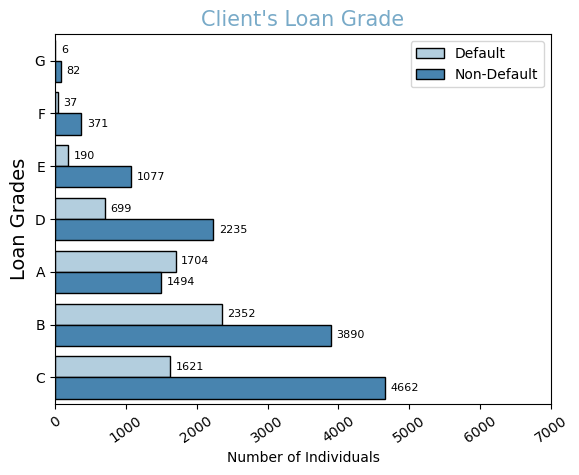

In [18]:
#Bar Graph Amount of the loan applied for by the borrower:
order_counts = train['grade'].value_counts().sort_values().index #Order the count values.

ax2=sns.countplot(y = 'grade', hue='customer_default_status', data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")
plt.title("Client's Loan Grade", color="#78AAC8", size=15 )
plt.legend(['Default','Non-Default'])
plt.xlabel('Number of Individuals', loc='center')
plt.ylabel('Loan Grades', loc='center', size=14)
plt.xticks(rotation=35)
ax2.bar_label(ax2.containers[0], size=8, padding=4)
ax2.bar_label(ax2.containers[1], size=8, padding=4)

ax2.set_xlim(right=7000)
plt.show()

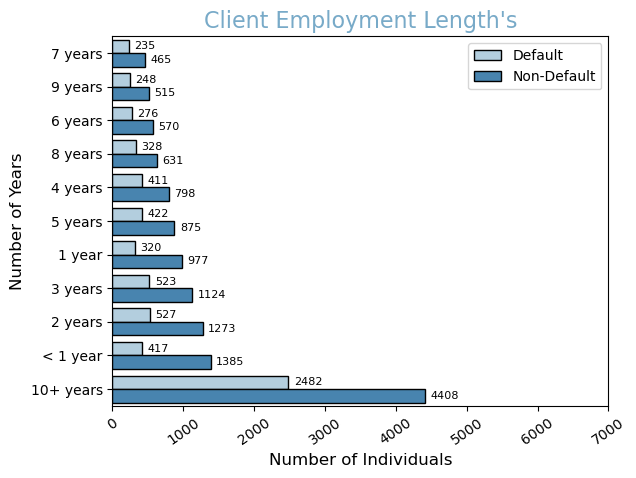

In [19]:
#Bar Graph of start date and end date of an individual's employment within an organization:
order_counts = train['emp_length'].value_counts().sort_values().index #Order the count values.
ax3=sns.countplot(y = 'emp_length', hue='customer_default_status', data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client Employment Length's", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Number of Years',size=12)
plt.xlabel('Number of Individuals',size=12)
ax3.bar_label(ax3.containers[0], size=8, padding=4) 
ax3.bar_label(ax3.containers[1], size=8, padding=4)

ax3.set_xlim(right=7000)

plt.show()

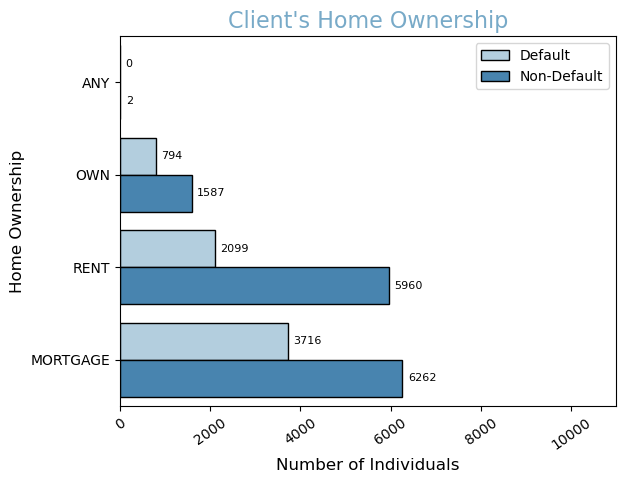

In [20]:
#Bar Graph home ownership status provided by the borrower during registration:
order_counts = train['home_ownership'].value_counts().sort_values().index #Order the count values.
ax4=sns.countplot(y = 'home_ownership', hue='customer_default_status', data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Home Ownership", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Home Ownership',size=12)
plt.xlabel('Number of Individuals',size=12)
ax4.bar_label(ax4.containers[0], size=8, padding=4)
ax4.bar_label(ax4.containers[1], size=8, padding=4)

ax4.set_xlim(right=11000)

plt.show()

In [21]:
datanottreated2['verification_status'].value_counts().sort_values()

verification_status
Verified           5875
Not Verified       6609
Source Verified    7936
Name: count, dtype: int64

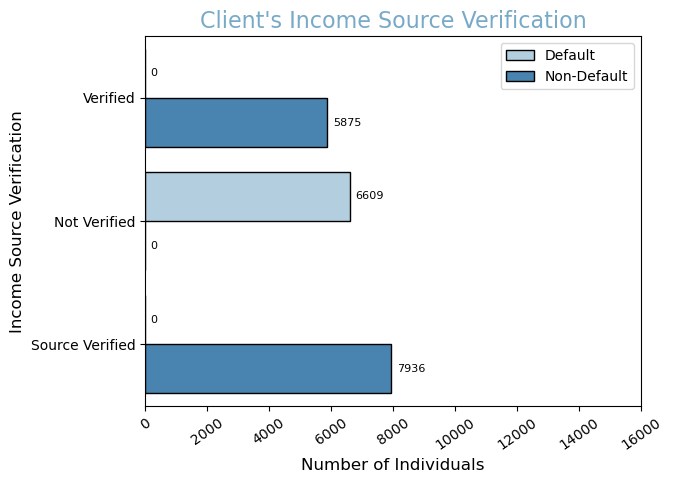

In [22]:
#Bar Graph Income was verified by LC, not verified, or if the income source was verified:

order_counts = train['verification_status'].value_counts().sort_values().index #Order the count values.
ax5=sns.countplot(y = 'verification_status', hue='customer_default_status',  data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Income Source Verification", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Income Source Verification',size=12)
plt.xlabel('Number of Individuals',size=12)
ax5.bar_label(ax5.containers[0], size=8, padding=4)
ax5.bar_label(ax5.containers[1], size=8, padding=4)

ax5.set_xlim(right=16000)

plt.show()

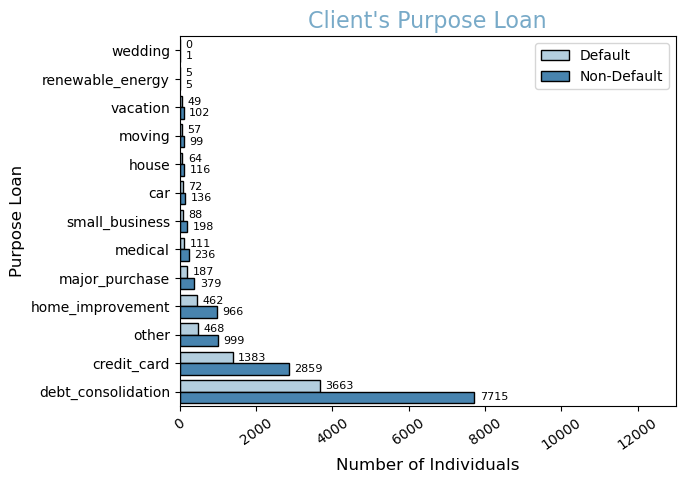

In [23]:
#Bar Graph borrower Purpose for the loan request:
order_counts = train['purpose'].value_counts().sort_values().index #Order the count values.
ax6=sns.countplot(y = 'purpose',  hue='customer_default_status', data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Purpose Loan", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Purpose Loan',size=12)
plt.xlabel('Number of Individuals',size=12)
ax6.bar_label(ax6.containers[0], size=8, padding=4)
ax6.bar_label(ax6.containers[1], size=8, padding=4)

ax6.set_xlim(right=13000)

plt.show()

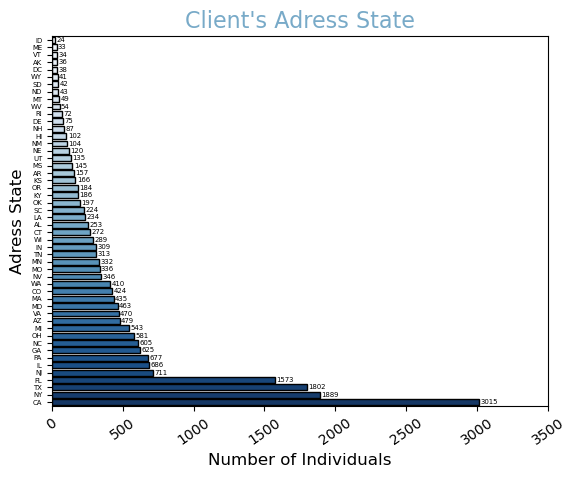

In [24]:
#Bar Graph State provided by the borrower in the loan application:
order_counts = train['addr_state'].value_counts().sort_values().index #Order the count values.
ax7=sns.countplot(y = 'addr_state', data = datanottreated2, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Adress State", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.yticks(fontsize=5)

plt.ylabel('Adress State',size=12)
plt.xlabel('Number of Individuals',size=12)
ax7.bar_label(ax7.containers[0], size=5 ,padding=1) 
ax7.set_xlim(right=3500)

plt.show()

First quartile is nan
Third quartile is nan
Maximum is 40000.0
Minimum is 1000.0


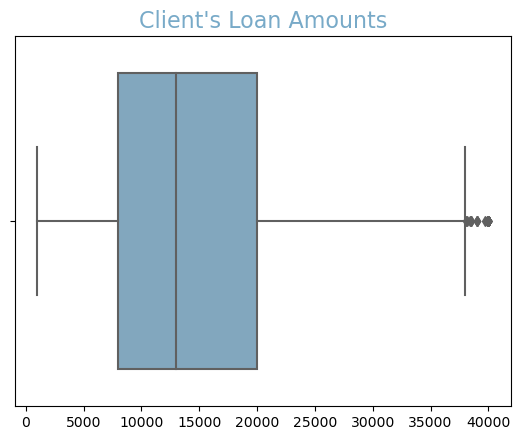

In [25]:
#Box-plot of Loan Amounts - to have idea of the outliers:
sns.boxplot(x='loan_amnt', data = datanottreated2, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(datanottreated2['loan_amnt'], [75 ,25]) #Defining the quartiles from Loans.
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(datanottreated2['loan_amnt']))) #Maximum Value of the Loans Amounts.
print('Minimum is '+str(min(datanottreated2['loan_amnt']))) #Minimum Value of the Loans Amounts.

First quartile is nan
Third quartile is nan
Maximum is 577211.0
Minimum is 0.0


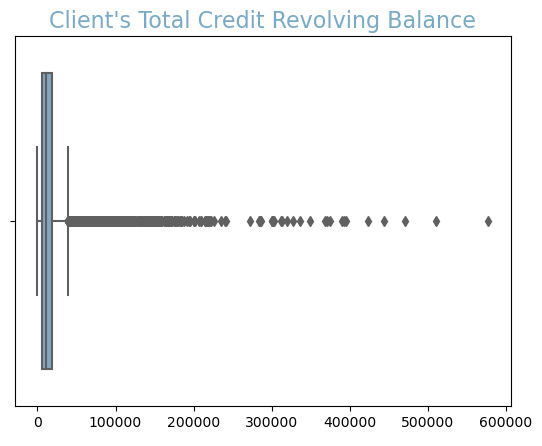

In [26]:
#Box-plot of Client's Total Credit Revolving Balance:
sns.boxplot(x='revol_bal', data = datanottreated2, color='#78AAC8')
plt.title("Client's Total Credit Revolving Balance", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(datanottreated2['revol_bal'], [75 ,25])
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(datanottreated2['revol_bal'])))
print('Minimum is '+str(min(datanottreated2['revol_bal'])))

 <a class="anchor" id="preparation">

# 3. Data Preprocessing

</a>

- 3.1 Data Preparation. <br>
- 3.2 Data Cleaning. <br>
- 3.3 Feature Engineering. <br>
- 3.4 Scaling Data. <br>

<a class="anchor" id="Preprocessing">

 # 3.1  Data Preparation

</a>

- 3.1.1 To make copies from the original dataset & Create Target Column. <br>
- 3.1.2 To drop columns. <br>
- 3.1.3 Change Datatypes of the Variables. <br>
- 3.1.4 Creating & Transforming into New columns. <br>
- 3.1.5 Coeherence Checking. <br>


#### 3.1.1 To make copies from the original dataset & Create Target Column.

In [27]:
#Just do a Copy from dataset train_p (Dataset Treated):
train_f = train_p.copy()

#So, lets create a condition for our Target Column (customer default status):
train_f['customer_default_status'] = 0 #Assign the new column all values with zero.

#The all conditions that satisfy for have a good loan, and insert 1 in customer default status.

#We are applying 1 to the new columns, where the condition is verified that is why we are converting to integer.
train_f['customer_default_status'] = ((train_f['verification_status'].isin(['Source Verified', 'Verified']))
                                             ).astype(int)
train_f.head() # table from our dataset with the first 5 rows.

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,customer_default_status
0,924308,40000,40000,40000,60 months,12.79,905.83,C,VP Technology,< 1 year,MORTGAGE,250000.0,Source Verified,1-Oct,home_improvement,GA,5.32,1,Jun-98,0,4,0,19,0.2,7,0,36198.46,1
1,924309,35000,35000,35000,36 months,15.59,1223.43,C,Management,10+ years,OWN,108000.0,Source Verified,1-Oct,debt_consolidation,CA,1.41,1,Mar-06,2,5,0,6053,93.1,13,0,21131.14,1
2,924310,8000,8000,8000,36 months,12.79,268.75,C,Courtroom Clerk,8 years,MORTGAGE,37000.0,Verified,1-Oct,debt_consolidation,FL,32.55,3,May-95,0,8,1,3130,34.8,34,0,13778.97,1
3,924311,2100,2100,2100,36 months,12.79,70.55,C,Clerk,3 years,RENT,29000.0,Source Verified,1-Oct,credit_card,IL,11.30,2,Oct-84,0,22,0,64238,40.4,71,0,32802.37,1
4,924312,5000,5000,5000,36 months,11.49,164.86,B,Store Manager,5 years,MORTGAGE,78600.0,Verified,1-Oct,debt_consolidation,PA,31.13,0,Feb-02,0,13,0,19772,42.2,48,0,17903.75,1


#### 3.1.2 To drop columns.

In [28]:
# Drop Columns from dataset that we believe that will not be worth use, for our analysis:
#train_f = train_f.drop(columns='id')  Is indexed the ID
train_f = train_f.drop(columns='id') 
train_f = train_f.drop(columns='total_acc') 
train_f = train_f.drop(columns='open_acc') 
train_f = train_f.drop(columns='inq_last_6mths') 
train_f = train_f.drop(columns='funded_amnt_inv') 
train_f = train_f.drop(columns='out_prncp')
train_f = train_f.drop(columns='revol_util')
train_f = train_f.drop(columns='pub_rec')
train_f = train_f.drop(columns='issue_d')
train_f = train_f.drop(columns='earliest_cr_line')

# Remove the ; in the variable Total Payment.
train_f['total_pymnt'] = train_f['total_pymnt'].str.replace(';', '')
train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status
0,40000,40000,60 months,12.79,905.83,C,VP Technology,< 1 year,MORTGAGE,250000.0,Source Verified,home_improvement,GA,5.32,1,19,36198.46,1
1,35000,35000,36 months,15.59,1223.43,C,Management,10+ years,OWN,108000.0,Source Verified,debt_consolidation,CA,1.41,1,6053,21131.14,1
2,8000,8000,36 months,12.79,268.75,C,Courtroom Clerk,8 years,MORTGAGE,37000.0,Verified,debt_consolidation,FL,32.55,3,3130,13778.97,1
3,2100,2100,36 months,12.79,70.55,C,Clerk,3 years,RENT,29000.0,Source Verified,credit_card,IL,11.30,2,64238,32802.37,1
4,5000,5000,36 months,11.49,164.86,B,Store Manager,5 years,MORTGAGE,78600.0,Verified,debt_consolidation,PA,31.13,0,19772,17903.75,1


#### 3.1.3 Change Datatypes of the Variables.


In [29]:
# Converting to their right datatypes:

#flot64 loan_amnt to int64;

train_f['loan_amnt'] = train_f['loan_amnt'].astype('int64') 

#float64 funded_amnt to int64;

train_f['funded_amnt'] = train_f['funded_amnt'].astype('int64') 

#flot64 delinq_2yrs to int64;

train_f['delinq_2yrs'] = train_f['delinq_2yrs'].astype('int64')

#float64 revol_bal to int64;

train_f['revol_bal'] = train_f['revol_bal'].astype('int64') 

#object total_pymnt to float64;

train_f['total_pymnt'] = train_f['total_pymnt'].astype('float64') 

#### 3.1.4 Creating & Transforming into New columns.


In [30]:
#Creating a New Column for understand the Payment Progress of the Client Loans.
train_f['Payment Progress']=train_f['funded_amnt']/train_f['total_pymnt']
train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,40000,40000,60 months,12.79,905.83,C,VP Technology,< 1 year,MORTGAGE,250000.0,Source Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.105019
1,35000,35000,36 months,15.59,1223.43,C,Management,10+ years,OWN,108000.0,Source Verified,debt_consolidation,CA,1.41,1,6053,21131.14,1,1.656323
2,8000,8000,36 months,12.79,268.75,C,Courtroom Clerk,8 years,MORTGAGE,37000.0,Verified,debt_consolidation,FL,32.55,3,3130,13778.97,1,0.580595
3,2100,2100,36 months,12.79,70.55,C,Clerk,3 years,RENT,29000.0,Source Verified,credit_card,IL,11.30,2,64238,32802.37,1,0.064020
4,5000,5000,36 months,11.49,164.86,B,Store Manager,5 years,MORTGAGE,78600.0,Verified,debt_consolidation,PA,31.13,0,19772,17903.75,1,0.279271


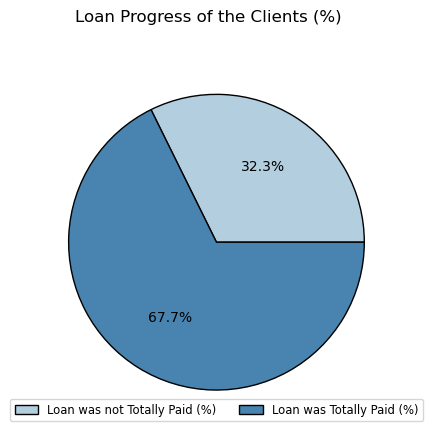

In [31]:
#Pie-Chart Loan Progress of the Clients %:

# Condition for Filter the when the Payment is lower than 1 or higher or equal 1:
lower_1 = train_f[train_f['Payment Progress'] < 1] # Their Loan was not Totally Paid.
greater_1 = train_f[train_f['Payment Progress'] >1 ] # Their Loan was Totally Paid.

#Colours for the Pie Chart Graph
colors = ['#B3CEDE', '#4884AF']
sizes = [len(lower_1), len(greater_1)] # All the values that are not greater than 1, and the values
                                            #that are greater or equal to 1.

    #Creating the Pie Chart according the sizes values, the colours that we select before, the respective percentages value
        #with the format number, and the put a border in pie chat.
ax7= plt.pie(sizes, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.suptitle('Loan Progress of the Clients (%)', fontsize='large')  # Title at upper center
plt.legend(['Loan was not Totally Paid (%)','Loan was Totally Paid (%)'],loc='lower center',ncol=2, fontsize='small') #ncol= organizes the
                                                                                                    # the legend of the labels.

#### 3.1.5 Coeherence Checking.


In [32]:
# Put Verified and Source Verified togheter in verification_status.
train_f['verification_status'].replace('Source Verified', 'Verified', inplace=True)

# We must take care of data as well, the decimal houses in Loan Amounts, Annual Income, and total_pymnt. 
train_f['installment'] = train_f['installment'].round(2) #Round money with 2 decimal houses.
train_f['annual_inc'] = train_f['annual_inc'].round(2) #Round money with 2 decimal houses.
train_f['total_pymnt'] = train_f['total_pymnt'].round(2) #Round money with 2 decimal houses.
train_f['loan_amnt'] = train_f['loan_amnt'].round(2) #Round money with 2 decimal houses.
train_f['funded_amnt'] = train_f['funded_amnt'].round(2) #Round money with 2 decimal houses.
train_f['int_rate'] = train_f['int_rate'].round(2) #Round Percentage with 2 decimal houses.
train_f['Payment Progress'] = train_f['Payment Progress'].round(2) #Round percentage with 2 decimal houses.
train_f['revol_bal'] = train_f['revol_bal'].round(2) #Round money with 2 decimal houses.
train_f['dti'] = train_f['dti'].round(2) #Round percentage with 2 decimal houses.


# Remove the + in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('+', '')
# This will replace the whole string ‘less than 1 year’ with the string ‘0’
train_f['emp_length'] = train_f['emp_length'].str.replace('< 1', str(0))
# Remove the years in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('years', '')
# Remove the 'year in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('year', '') 
# Remove the months in the variable Term and let just only 36.
train_f['term'] = train_f['term'].str.replace("36 months", '36')
# Remove the months in the variable Term and let just only 60.
train_f['term'] = train_f['term'].str.replace("60 months", '60')

train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,40000,40000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,250000.0,Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.11
1,35000,35000,36,15.59,1223.43,C,Management,10,OWN,108000.0,Verified,debt_consolidation,CA,1.41,1,6053,21131.14,1,1.66
2,8000,8000,36,12.79,268.75,C,Courtroom Clerk,8,MORTGAGE,37000.0,Verified,debt_consolidation,FL,32.55,3,3130,13778.97,1,0.58
3,2100,2100,36,12.79,70.55,C,Clerk,3,RENT,29000.0,Verified,credit_card,IL,11.30,2,64238,32802.37,1,0.06
4,5000,5000,36,11.49,164.86,B,Store Manager,5,MORTGAGE,78600.0,Verified,debt_consolidation,PA,31.13,0,19772,17903.75,1,0.28


<a class="anchor" id="Cleaning">
    
# 3.2 Data Cleaning 


</a>


- 3.2.1 To check missing values. <br>
- 3.2.2 To fill in missing values. (quantitative = mean and categorical= mode). <br>
- 3.2.3 To detect and remove outliers. <br>
- 3.2.4 Create Dummies for Categorical Variables. <br>
- 3.2.5 Scaling Variables. <br>

#### 3.2.1 To check missing values.

In [33]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train_f.isna().sum()

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                  1224
emp_length                 1210
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                          18
delinq_2yrs                   0
revol_bal                     0
total_pymnt                   0
customer_default_status       0
Payment Progress              0
dtype: int64

In [34]:
# We can understand according the shape of our data, the percentage of the missing values (NA Values).

# Sum of all mising values for each different categorie/ all values of dataset.
train_f.isna().sum()/len(train_f)*100

loan_amnt                  0.000000
funded_amnt                0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_title                  5.941748
emp_length                 5.873786
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.087379
delinq_2yrs                0.000000
revol_bal                  0.000000
total_pymnt                0.000000
customer_default_status    0.000000
Payment Progress           0.000000
dtype: float64

#### 3.2.2 To fill in missing values (quantitative = mean and categorical= mode).

In [35]:
#So basically from all the columns from train_f that are object, will fill in that respective column with the mode.
# and from train_f that are integer, will fill in that respective column with their mean from the column.

object_columns = train_f.select_dtypes(include='object').columns.tolist() # Selecting only categorical columns from our dataset.
numeric_columns = train_f.select_dtypes(include=['int', 'float']).columns.tolist() # Selecting only numeric columns from our dataset.

# Fill missing values in categorical type columns with their respective modes
for column in object_columns:
    mode_value = train_f[column].mode()[0]  # Calculate mode for each column, ensuring only 1 mode picked.
    train_f[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Fill missing values in numeric columns with their respective means
for column in numeric_columns:
    mean_value = train_f[column].mean()  # Calculate mean for each column
    train_f[column].fillna(mean_value, inplace=True)  # Fill missing values with mean

train_f

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,40000,40000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,250000.0,Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.11
1,35000,35000,36,15.59,1223.43,C,Management,10,OWN,108000.0,Verified,debt_consolidation,CA,1.41,1,6053,21131.14,1,1.66
2,8000,8000,36,12.79,268.75,C,Courtroom Clerk,8,MORTGAGE,37000.0,Verified,debt_consolidation,FL,32.55,3,3130,13778.97,1,0.58
3,2100,2100,36,12.79,70.55,C,Clerk,3,RENT,29000.0,Verified,credit_card,IL,11.30,2,64238,32802.37,1,0.06
4,5000,5000,36,11.49,164.86,B,Store Manager,5,MORTGAGE,78600.0,Verified,debt_consolidation,PA,31.13,0,19772,17903.75,1,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,5200,5200,36,9.17,165.78,B,sonographer,10,OWN,85000.0,Verified,debt_consolidation,IL,11.71,0,11726,6123.74,1,0.85
20596,12800,12800,60,12.59,288.56,C,maintenance tech,10,MORTGAGE,40000.0,Not Verified,vacation,KY,30.72,0,11389,1120.16,0,11.43
20597,16000,16000,36,13.67,544.29,C,Realtor,4,MORTGAGE,65000.0,Not Verified,debt_consolidation,TX,17.71,0,38078,22294.19,0,0.72
20598,25000,25000,36,7.89,782.15,A,Sales Representative,9,MORTGAGE,160000.0,Not Verified,debt_consolidation,NY,11.24,1,175,2919.64,0,8.56


In [36]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train_f.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
revol_bal                  0
total_pymnt                0
customer_default_status    0
Payment Progress           0
dtype: int64

#### 3.2.3 To detect and remove outliers.

In [37]:
#The method that we will use for treat the outliers. Is to change by their median and Winsorization, because if we remove them
#we will lose information. We can not change by their mean because the value is already affected by the outliers, so we will
#just replace by their median in the variables that we have low outliers and regarding, where we have more than 5% outliers 
#we will use Winsorization because is not the best approach use the median, because the median is affect as well by the outliers
#so we believe replacing by the Winsorization, is the best approach because will replace that specific outliers from the values
#that are closest to the q3 and q1 and is not affecting the scale of the variable. We only will apply the Winsorization
#in the variable total payment, dti and revol bal need be cared, because they have excessive % values of outliers.

In [38]:
train_f.describe() # For we know the median of our variables (50%).
#Statistics description from all variables.

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
count,20600.000000,20600.000000,20600.000000,20600.000000,2.060000e+04,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.00
mean,14988.911408,14988.911408,12.647287,440.807678,7.869492e+04,19.146191,0.319709,15995.527864,10288.606722,0.676553,inf
std,8957.464124,8957.464124,4.424565,259.559683,5.961113e+04,15.185819,0.874259,22495.756223,10107.147965,0.467803,NaN
min,1000.000000,1000.000000,5.320000,30.540000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.02
25%,8000.000000,8000.000000,9.170000,252.490000,4.800000e+04,11.810000,0.000000,5412.250000,2380.475000,0.000000,0.77
50%,13000.000000,13000.000000,11.990000,379.235000,6.800000e+04,18.200000,0.000000,10485.000000,6745.135000,1.000000,1.91
75%,20000.000000,20000.000000,14.850000,590.952500,9.500000e+04,25.200000,0.000000,19066.000000,15339.320000,1.000000,5.78
max,40000.000000,40000.000000,30.990000,1445.900000,3.964280e+06,999.000000,15.000000,577211.000000,58558.310000,1.000000,inf


#### 3.2.3.1 Treating the Outliers (loan_amnt Variable)


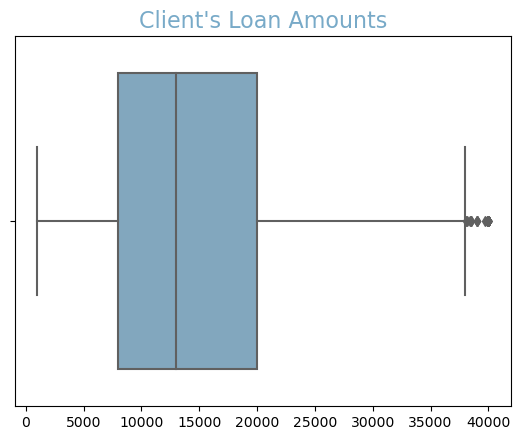

In [39]:
#Box-plot of Client's Amounts:
sns.boxplot(x='loan_amnt', data = train_f, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['loan_amnt'], [75 ,25])

In [40]:
#Vizualization of how many outliers we have in Loan Clients:

train_f.loc[train_f['loan_amnt']>35000]
#we have 131 outliers in 20600 rows (0.63%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,40000,40000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,250000.0,Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.11
21,40000,40000,60,14.49,940.93,C,manager,5,MORTGAGE,84960.0,Verified,debt_consolidation,CA,8.44,0,9409,45046.31,1,0.89
24,40000,40000,36,6.99,1234.91,A,Pilot,10,RENT,189000.0,Verified,debt_consolidation,GA,18.63,0,9537,11267.97,1,3.55
45,36725,36725,36,9.49,1176.24,B,Contract Manager,8,MORTGAGE,82000.0,Verified,debt_consolidation,CA,10.78,1,1957,13684.60,1,2.68
96,40000,40000,60,24.49,1162.13,E,Captain,10,OWN,93694.0,Verified,debt_consolidation,NV,26.31,0,15727,3066.84,1,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,36000,36000,60,10.99,782.55,B,Group Operations Manager,10,OWN,101000.0,Verified,debt_consolidation,TX,29.47,0,59694,29510.38,1,1.22
5323,40000,40000,60,15.59,964.03,C,Sr. Project Manager,0,MORTGAGE,220000.0,Verified,home_improvement,NV,17.87,0,21826,21242.49,1,1.88
5327,36400,36400,60,14.49,856.24,C,Teacher,5,RENT,95000.0,Verified,home_improvement,IL,12.99,0,4782,35628.44,1,1.02
5332,40000,40000,60,10.49,859.56,B,Financial Advisor,5,MORTGAGE,150000.0,Verified,credit_card,TX,23.93,1,22772,20550.40,1,1.95


In [41]:
#Change the variable loan_amnt their all outliers from their respective median:
train_f.loc[(train_f['loan_amnt'] >= 35000), 'loan_amnt'] = 13000 #for we not change the datatype of variable.


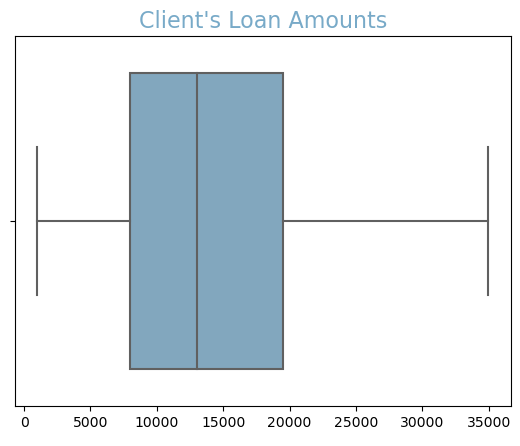

In [42]:
#Box-plot of Client's Amounts (Treated):
sns.boxplot(x='loan_amnt', data = train_f, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['loan_amnt'], [75 ,25])

#### 3.2.3.2 Treating the Outliers (funded_amnt Variable)


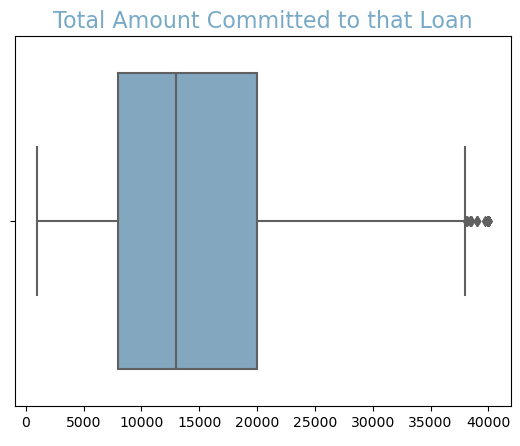

In [43]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='funded_amnt', data = train_f, color='#78AAC8')
plt.title("Total Amount Committed to that Loan", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['funded_amnt'], [75 ,25])

In [44]:
#Vizualization of how many outliers we have in Funded_amnt:

train_f.loc[train_f['funded_amnt']>35000]
#we have 131 outliers in 20600 rows (0.63%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,13000,40000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,250000.0,Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.11
21,13000,40000,60,14.49,940.93,C,manager,5,MORTGAGE,84960.0,Verified,debt_consolidation,CA,8.44,0,9409,45046.31,1,0.89
24,13000,40000,36,6.99,1234.91,A,Pilot,10,RENT,189000.0,Verified,debt_consolidation,GA,18.63,0,9537,11267.97,1,3.55
45,13000,36725,36,9.49,1176.24,B,Contract Manager,8,MORTGAGE,82000.0,Verified,debt_consolidation,CA,10.78,1,1957,13684.60,1,2.68
96,13000,40000,60,24.49,1162.13,E,Captain,10,OWN,93694.0,Verified,debt_consolidation,NV,26.31,0,15727,3066.84,1,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,13000,36000,60,10.99,782.55,B,Group Operations Manager,10,OWN,101000.0,Verified,debt_consolidation,TX,29.47,0,59694,29510.38,1,1.22
5323,13000,40000,60,15.59,964.03,C,Sr. Project Manager,0,MORTGAGE,220000.0,Verified,home_improvement,NV,17.87,0,21826,21242.49,1,1.88
5327,13000,36400,60,14.49,856.24,C,Teacher,5,RENT,95000.0,Verified,home_improvement,IL,12.99,0,4782,35628.44,1,1.02
5332,13000,40000,60,10.49,859.56,B,Financial Advisor,5,MORTGAGE,150000.0,Verified,credit_card,TX,23.93,1,22772,20550.40,1,1.95


In [45]:
#Change the variable loan_amnt their all outliers from their respective median:
train_f.loc[(train_f['funded_amnt'] >= 35000), 'funded_amnt'] = 13000 #for we not change the datatype of variable.

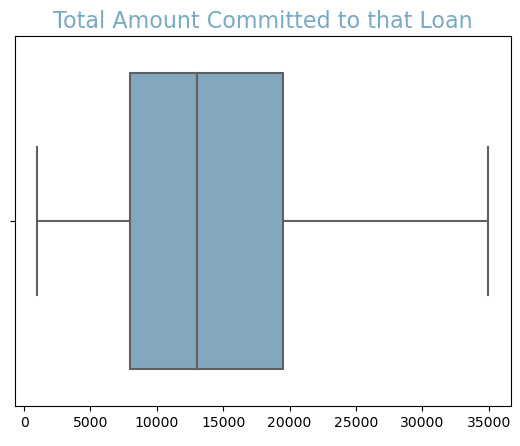

In [46]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='funded_amnt', data = train_f, color='#78AAC8')
plt.title("Total Amount Committed to that Loan", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['funded_amnt'], [75 ,25])

#### 3.2.3.3 Treating the Outliers (installment Variable)


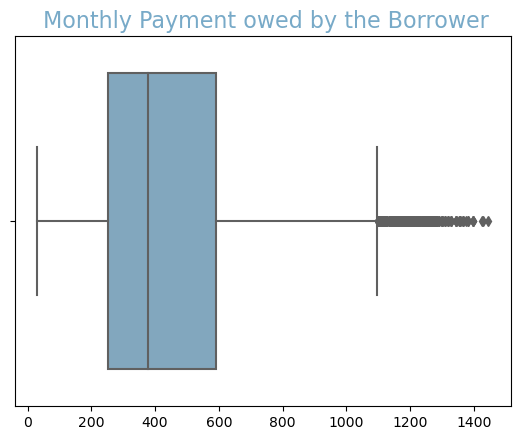

In [47]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='installment', data = train_f, color='#78AAC8')
plt.title(" Monthly Payment owed by the Borrower", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 1098.

q3, q1 = np.percentile(train_f['installment'], [75 ,25])

In [48]:
#Vizualization of how many outliers we have in Installment:

train_f.loc[train_f['installment']>1098]
#we have 528 outliers in 20600 rows (2.56%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
1,13000,13000,36,15.59,1223.43,C,Management,10,OWN,108000.0,Verified,debt_consolidation,CA,1.41,1,6053,21131.14,1,1.66
24,13000,13000,36,6.99,1234.91,A,Pilot,10,RENT,189000.0,Verified,debt_consolidation,GA,18.63,0,9537,11267.97,1,3.55
37,13000,13000,36,13.99,1196.05,C,Senior Manager,10,RENT,169000.0,Verified,debt_consolidation,VA,13.25,0,7290,14236.38,1,2.46
45,13000,13000,36,9.49,1176.24,B,Contract Manager,8,MORTGAGE,82000.0,Verified,debt_consolidation,CA,10.78,1,1957,13684.60,1,2.68
96,13000,13000,60,24.49,1162.13,E,Captain,10,OWN,93694.0,Verified,debt_consolidation,NV,26.31,0,15727,3066.84,1,13.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511,13000,13000,36,13.18,1182.33,C,Sr. National Account Manager,10,MORTGAGE,185000.0,Verified,debt_consolidation,GA,9.41,0,16557,6399.67,1,5.47
20515,13000,13000,36,12.59,1172.39,C,Architect,7,MORTGAGE,126000.0,Verified,debt_consolidation,NJ,5.63,0,8153,5330.01,1,6.57
20545,13000,13000,36,10.64,1139.90,B,Systems Administrator,10,OWN,83000.0,Verified,debt_consolidation,MD,30.16,1,11862,4367.78,1,8.01
20578,13000,13000,36,9.17,1115.77,B,Risk Assessment Program Manager,9,MORTGAGE,132000.0,Not Verified,debt_consolidation,CA,25.26,0,18281,27675.91,0,1.26


In [49]:
#Change the variable installment their all outliers:
Winsorization_inst = winsorize(train_f['installment'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

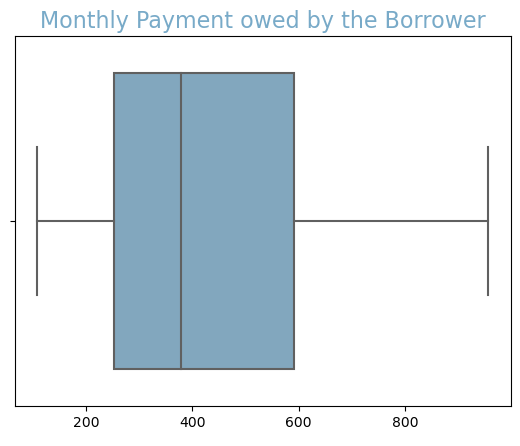

In [50]:
#Implementing the new Clients Loan Amounts:
train_f['installment'] = Winsorization_inst
sns.boxplot(x='installment', data = train_f, color='#78AAC8')
plt.title("Monthly Payment owed by the Borrower", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.3.4 Treating the Outliers (annual_inc Variable)


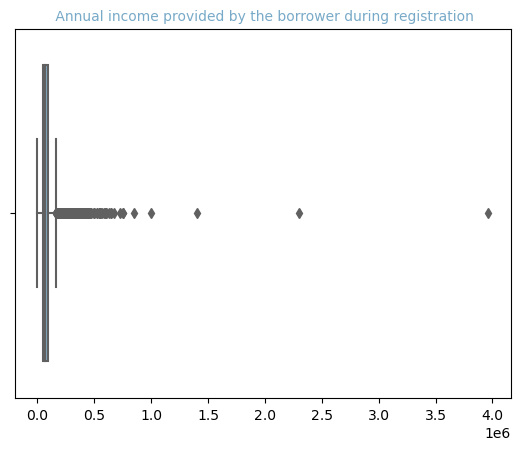

In [51]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='annual_inc', data = train_f, color='#78AAC8')
plt.title(" Annual income provided by the borrower during registration", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 165500.

q3, q1 = np.percentile(train_f['annual_inc'], [75 ,25])



In [52]:
#Vizualization of how many outliers we have in annual_inc:

train_f.loc[train_f['annual_inc']>165500]
#we have 915 outliers in 20600 rows (4.44%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,13000,13000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,250000.0,Verified,home_improvement,GA,5.32,1,19,36198.46,1,1.11
24,13000,13000,36,6.99,956.37,A,Pilot,10,RENT,189000.0,Verified,debt_consolidation,GA,18.63,0,9537,11267.97,1,3.55
37,13000,13000,36,13.99,956.37,C,Senior Manager,10,RENT,169000.0,Verified,debt_consolidation,VA,13.25,0,7290,14236.38,1,2.46
41,20000,20000,36,5.32,602.30,A,Police Officer,10,MORTGAGE,171000.0,Verified,debt_consolidation,DE,16.68,0,22971,26570.82,1,0.75
68,25000,25000,36,6.99,771.82,A,Associate,3,MORTGAGE,170000.0,Not Verified,debt_consolidation,WA,24.76,0,30996,17716.68,0,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20548,20000,20000,36,8.38,630.24,B,realtor,10,MORTGAGE,350000.0,Verified,home_improvement,NY,0.36,1,110,1555.12,1,12.86
20560,5000,5000,36,11.22,164.22,B,SR. Hydro Site Manager,1,RENT,350000.0,Verified,debt_consolidation,NJ,3.61,3,7617,13719.52,1,0.36
20567,25575,25575,60,10.64,551.49,B,Vice President and Controller,10,MORTGAGE,195000.0,Not Verified,debt_consolidation,DC,19.14,3,8331,2659.66,0,9.62
20587,13000,13000,36,9.76,956.37,B,CFO,2,OWN,240000.0,Verified,debt_consolidation,TX,29.18,1,8126,16464.01,1,2.13


In [53]:
#Change the variable annual_inc their all outliers:
Winsorization_annual_inc = winsorize(train_f['annual_inc'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

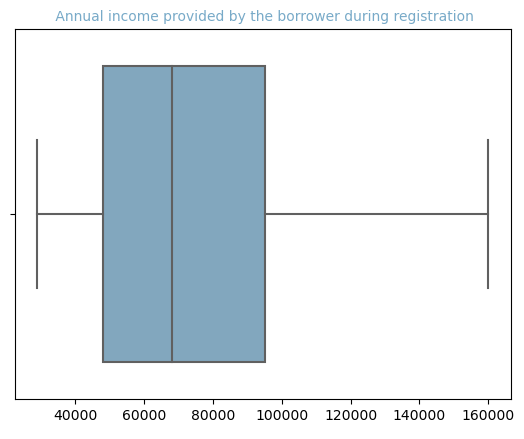

In [54]:
#Implementing the new variable annual_inc:
train_f['annual_inc'] = Winsorization_annual_inc
sns.boxplot(x='annual_inc', data = train_f, color='#78AAC8')
plt.title(" Annual income provided by the borrower during registration", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.3.5 Treating the Outliers (dti Variable)


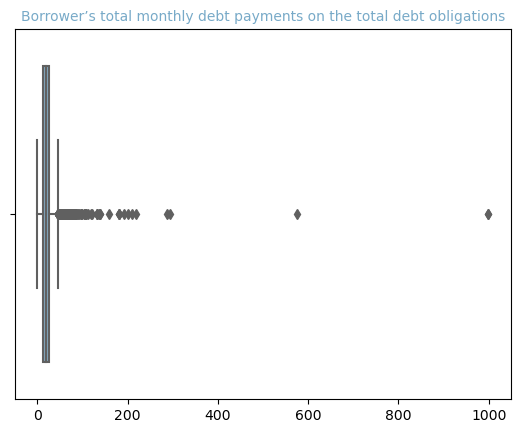

In [55]:
#Box-plot of Total DTI Ratio:
sns.boxplot(x='dti', data = train_f, color='#78AAC8')
plt.title("Borrower’s total monthly debt payments on the total debt obligations", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 45 and we have a negative number.

q3, q1 = np.percentile(train_f['dti'], [75 ,25])

In [56]:
#Vizualization of how many outliers we have in dti:

train_f.loc[train_f['dti']>45]
#we have 191 outliers in 20600 rows (0.92%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
115,14000,14000,60,10.49,300.85,B,Sales Engineer,6,MORTGAGE,115000.0,Not Verified,debt_consolidation,IL,45.77,0,11386,41399.11,0,0.34
10558,13000,13000,36,14.85,956.37,C,Product Manager,10,RENT,98000.0,Verified,debt_consolidation,IL,67.40,0,9659,0.00,1,inf
10597,20000,20000,36,9.80,643.47,B,Driver,10,MORTGAGE,90000.0,Not Verified,debt_consolidation,MN,53.72,0,34862,523.35,0,38.22
10713,25000,25000,36,5.32,752.87,A,Senior CAD Designer,10,RENT,74000.0,Not Verified,debt_consolidation,NJ,52.38,0,2668,164.15,0,152.30
10731,5000,5000,36,8.49,157.82,B,Seniro Computer Service Technician,10,MORTGAGE,160000.0,Verified,debt_consolidation,CA,48.50,0,20467,1256.30,1,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,21600,21600,36,9.17,688.59,B,Registered Nurse Case Manager,0,RENT,70000.0,Not Verified,debt_consolidation,FL,50.86,0,9371,12879.12,0,1.68
17985,15000,15000,60,17.57,377.41,D,Sr. Business Analyst,8,MORTGAGE,80000.0,Verified,debt_consolidation,AR,65.20,0,17746,20393.79,1,0.74
18012,33000,33000,60,21.99,911.24,F,Board Operator,0,MORTGAGE,120000.0,Verified,credit_card,OK,46.67,0,9209,5087.63,1,6.49
19517,24000,24000,36,12.59,803.93,C,Pathology Transcriber,10,OWN,45000.0,Verified,major_purchase,CA,48.08,1,2394,8469.65,1,2.83


In [57]:
#Change the variable dti their all outliers:
Winsorization_dti = winsorize(train_f['dti'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

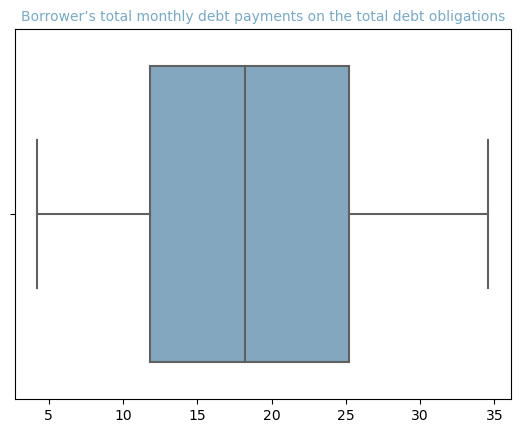

In [58]:
#Box-plot of Total DTI Ratio:
train_f['dti'] = Winsorization_dti
sns.boxplot(x='dti', data = train_f, color='#78AAC8')
plt.title("Borrower’s total monthly debt payments on the total debt obligations", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['dti'], [75 ,25])

#### 3.2.3.6 Treating the Outliers (revol_bal Variable)


Upper bound is 45.285


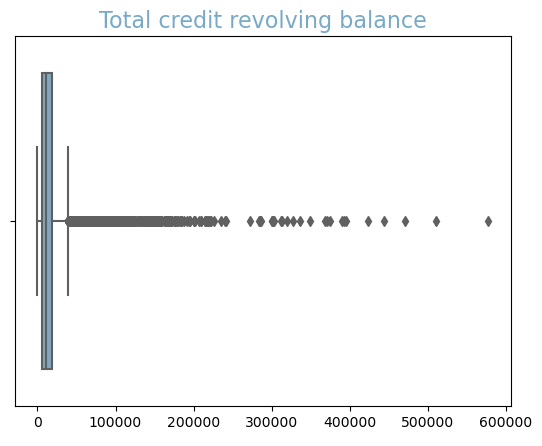

In [59]:
#Box-plot of Total credit revolving balance:
sns.boxplot(x='revol_bal', data = train_f, color='#78AAC8')
plt.title("Total credit revolving balance", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

iqr = q3-q1
qmax= q3 + 1.5*iqr
print('Upper bound is '+ str(qmax)) # The Outliers is above of 39546 and we have a negative number.

q3, q1 = np.percentile(train_f['revol_bal'], [75 ,25])

In [60]:
#Vizualization of how many outliers we have in revol_bal:

train_f.loc[train_f['revol_bal']>39546]
#we have 1344 outliers in 20600 rows (6.52%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
3,2100,2100,36,12.79,108.86,C,Clerk,3,RENT,29000.00,Verified,credit_card,IL,11.30,2,64238,32802.37,1,0.06
14,7475,7475,36,21.49,283.51,D,Security,10,RENT,29000.00,Verified,debt_consolidation,VA,30.54,0,72496,23971.45,1,0.31
16,4000,4000,36,19.99,148.64,D,Teacher,10,MORTGAGE,29000.00,Verified,credit_card,OH,28.26,0,84212,36197.49,1,0.11
26,18000,18000,36,9.49,576.51,B,Sr. Mortgage Processor,8,MORTGAGE,100000.00,Verified,debt_consolidation,KY,30.02,0,54285,31511.37,1,0.57
29,8000,8000,36,16.99,285.19,D,Maintnance,10,MORTGAGE,30000.00,Not Verified,debt_consolidation,IL,34.59,0,80055,28087.25,0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20467,27925,27925,36,7.26,865.57,A,Programmer Analyst,5,RENT,140000.00,Verified,credit_card,PA,26.04,0,55588,10323.00,1,2.71
20498,19800,19800,36,14.48,681.35,C,Administrative Assistant,2,OWN,44000.00,Verified,debt_consolidation,HI,28.18,0,122321,6275.88,1,3.15
20553,17225,17225,36,17.86,621.52,D,Payroll Clerk / Front office,10,RENT,37492.08,Verified,debt_consolidation,CO,27.23,3,49797,6688.68,1,2.58
20575,17500,17500,36,9.76,562.71,B,Machine operator,5,MORTGAGE,35000.00,Verified,credit_card,SC,22.49,0,87694,1999.07,1,8.75


In [61]:
#Change the variable revol_bal their all outliers:
Winsorization_rev = winsorize(train_f['revol_bal'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

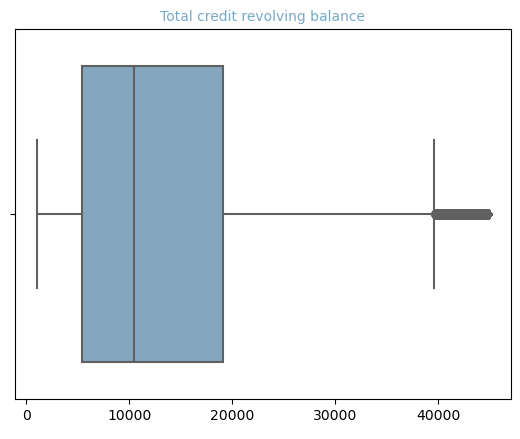

In [62]:
#Box-plot of Total credit revolving balance:
train_f['revol_bal'] = Winsorization_rev
sns.boxplot(x='revol_bal', data = train_f, color='#78AAC8')
plt.title("Total credit revolving balance", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['revol_bal'], [75 ,25])

#### 3.2.3.7 Treating the Outliers (total_pymnt Variable)


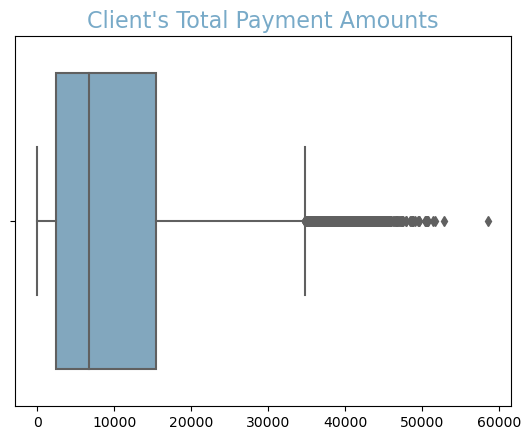

In [63]:
#Box-plot of Client's Total Payment Loan Amounts:
sns.boxplot(x='total_pymnt', data = train_f, color='#78AAC8')
plt.title("Client's Total Payment Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['total_pymnt'], [75 ,25])

In [64]:
#Vizualization of how many outliers we have in Funded Amount Investment Loan Clients:
q3, q1 = np.percentile(train_f['total_pymnt'], [75 ,25])

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) #We this value we understand the upper limit for we start delete the outliers (37806.60).
train_f.loc[train_f['total_pymnt']>34777] # We only see the rows with outliers above of 34777 in loans amounts.
#we have 756 outliers in 20600 rows (3.66%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status,Payment Progress
0,13000,13000,60,12.79,905.83,C,VP Technology,0,MORTGAGE,160000.0,Verified,home_improvement,GA,5.32,1,1061,36198.46,1,1.11
16,4000,4000,36,19.99,148.64,D,Teacher,10,MORTGAGE,29000.0,Verified,credit_card,OH,28.26,0,44859,36197.49,1,0.11
19,12000,12000,36,11.49,395.66,B,owner,5,MORTGAGE,30000.0,Verified,debt_consolidation,NY,13.85,1,10531,44863.31,1,0.27
21,13000,13000,60,14.49,940.93,C,manager,5,MORTGAGE,84960.0,Verified,debt_consolidation,CA,8.44,0,9409,45046.31,1,0.89
31,3500,3500,36,14.49,120.46,C,Adult Care Giver,10,OWN,29000.0,Verified,debt_consolidation,AL,20.31,0,25588,38966.50,1,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490,10000,10000,60,14.85,237.12,C,Hardware and Software Develpment,3,RENT,42000.0,Verified,debt_consolidation,LA,19.74,0,22278,36375.16,1,0.27
10809,6000,6000,36,6.49,183.87,A,Lending System Administrator,0,MORTGAGE,50000.0,Not Verified,debt_consolidation,IL,11.64,0,30948,37600.00,0,0.16
13911,9000,9000,36,9.76,289.40,B,registered nurse,8,MORTGAGE,54000.0,Verified,debt_consolidation,MS,4.24,0,2328,35504.39,1,0.25
17988,8400,8400,36,16.99,299.45,D,Guest Services Representative,2,RENT,35000.0,Verified,credit_card,CA,30.24,4,29805,35278.47,1,0.24


In [65]:
#Change the variable total_pymnt their all outliers:
Winsorization_total_pymt = winsorize(train_f['total_pymnt'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

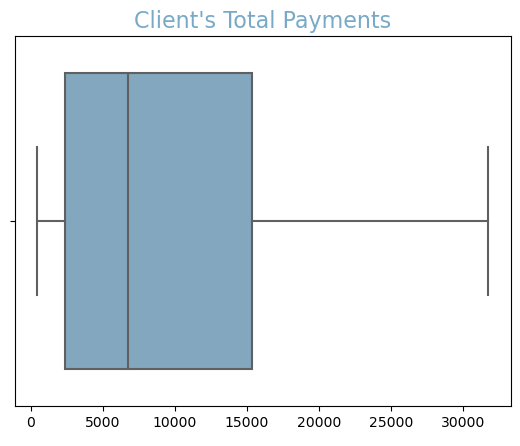

In [66]:
#Implementing the Client's Total Payment Loan Amounts:
train_f['total_pymnt'] = Winsorization_total_pymt
sns.boxplot(x='total_pymnt', data = train_f, color='#78AAC8')
plt.title("Client's Total Payments", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.4 Create Dummies for Categorical Variables.

In [67]:
#Using the Label Encoder, we will transform our categorical variables into dummies for we could analyse the relationships
#with the quantitative variables and the categorical variables, because some algorithms only work with numerical variables.
label_encoder = preprocessing.LabelEncoder() #Have a order and transform the categorical variables into numerical.

train_f['term']= label_encoder.fit_transform(train_f['term']) 
train_f['grade']= label_encoder.fit_transform(train_f['grade']) 
train_f['emp_length']= label_encoder.fit_transform(train_f['emp_length']) 
train_f['home_ownership']= label_encoder.fit_transform(train_f['home_ownership']) 
train_f['verification_status']= label_encoder.fit_transform(train_f['verification_status']) 
train_f['purpose']= label_encoder.fit_transform(train_f['purpose']) 
train_f['addr_state']= label_encoder.fit_transform(train_f['addr_state']) 
train_f['emp_title']= label_encoder.fit_transform(train_f['emp_title']) 
train_f = train_f.drop(columns='Payment Progress') #na Values

#### 3.2.5 Scaling Variables.

In [68]:
train_f.describe() # All data description and treated.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status
count,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000
mean,13834.850728,13834.850728,0.289757,12.647287,434.845651,1.724078,5403.784660,3.477913,1.904223,75243.474239,0.676553,2.663155,22.397524,18.654577,0.319709,14050.416019,9986.303685,0.676553
std,7578.439795,7578.439795,0.453661,4.424565,237.865444,1.224014,2908.720812,2.672415,0.935152,35457.101597,0.467803,2.177091,14.670281,8.693423,0.874259,11747.579100,9238.913613,0.467803
min,1000.000000,1000.000000,0.000000,5.320000,108.860000,0.000000,0.000000,0.000000,0.000000,29000.000000,0.000000,0.000000,0.000000,4.240000,0.000000,1061.000000,461.910000,0.000000
25%,8000.000000,8000.000000,0.000000,9.170000,252.490000,1.000000,2885.000000,2.000000,1.000000,48000.000000,0.000000,2.000000,9.000000,11.810000,0.000000,5412.250000,2380.475000,0.000000
50%,13000.000000,13000.000000,0.000000,11.990000,379.235000,2.000000,5666.500000,2.000000,2.000000,68000.000000,1.000000,2.000000,22.000000,18.200000,0.000000,10485.000000,6745.135000,1.000000
75%,19506.250000,19506.250000,1.000000,14.850000,590.952500,2.000000,8223.250000,5.000000,3.000000,95000.000000,1.000000,2.000000,34.000000,25.200000,0.000000,19066.000000,15339.320000,1.000000
max,34975.000000,34975.000000,1.000000,30.990000,956.370000,6.000000,10214.000000,10.000000,3.000000,160000.000000,1.000000,12.000000,49.000000,34.590000,15.000000,44859.000000,31737.960000,1.000000


In [69]:
#Do not run this code, because we will treat the data in front for each type train, validation and test. 
#If we treated 2 times, it will be unbalanced. Here, is only to prove that we know scale the data, and export for Afshin 
#professor that data was all tretated.

#X_train_c = train_f.drop('customer_default_status', axis = 1) # Goal is to scale all the variables from train, without target variable.
#y_train_c = train_f['customer_default_status'] # Goal is to scale only with the target variable.

#scaler = MinMaxScaler().fit(X_train_c)
#minmax_train_c = scaler.transform(X_train_c)

#X_train_c = pd.DataFrame(minmax_train_c, columns = X_train_c.columns, index=X_train_c.index)
#X_train_c

In [70]:
#Exporting the Data Treated (only for deliver, that this code is used):
#X_train_c.to_csv('Data Treated (unseen_dataset).csv', index=None)

<a class="anchor" id="Cleaning">   

    
 # 4. Feature Selection


</a>

- 4.1 Univariate variables. <br>
- 4.2 Spearman & Pearson Correlation. <br>
- 4.3 ANOVA Test. <br>

#### 4.1 Univariate variables.

In [71]:
#Observing the Correlation graphs we must drop the loan_amnount, founded_amount, int_rate columns, verification_status because
#they are higly correlated, and the payment Progress because haves na values.
train_f = train_f.drop(columns='loan_amnt')
train_f = train_f.drop(columns='funded_amnt')
train_f = train_f.drop(columns='int_rate')
train_f = train_f.drop(columns='verification_status')

In [72]:
train_f.var()
#measures the spread or dispersion of data points around the mean.

term                       2.058080e-01
installment                5.657997e+04
grade                      1.498211e+00
emp_title                  8.460657e+06
emp_length                 7.141801e+00
home_ownership             8.745101e-01
annual_inc                 1.257206e+09
purpose                    4.739727e+00
addr_state                 2.152171e+02
dti                        7.557561e+01
delinq_2yrs                7.643283e-01
revol_bal                  1.380056e+08
total_pymnt                8.535752e+07
customer_default_status    2.188395e-01
dtype: float64

#### 4.2  Pearson & Spearman Correlation.

In [73]:
#Pearson Correlation Table:
cor_pearson = train_f.corr(method='pearson')
cor_pearson

,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status
term,1.000000,0.176989,0.416579,-0.025999,0.011666,-0.094097,0.120873,0.002734,-0.010393,0.009533,0.002284,-0.003459,-0.019835,-0.067332
installment,0.176989,1.000000,0.146968,-0.030592,0.026021,-0.143177,0.459884,-0.011333,-0.008084,0.011612,-0.000480,0.014000,0.012070,0.058060
grade,0.416579,0.146968,1.000000,0.010346,0.009164,0.091423,-0.139157,-0.008209,0.006809,0.004716,0.002868,0.010544,0.020006,0.234722
emp_title,-0.025999,-0.030592,0.010346,1.000000,-0.039581,-0.033324,-0.054940,0.014391,0.001539,-0.001198,0.010619,-0.000137,-0.001455,-0.004459
emp_length,0.011666,0.026021,0.009164,-0.039581,1.000000,-0.009831,0.010263,-0.003619,0.007964,-0.003041,-0.000323,0.001849,0.001342,-0.024102
home_ownership,-0.094097,-0.143177,0.091423,-0.033324,-0.009831,1.000000,-0.236147,0.002180,0.017429,-0.006654,0.004916,0.001807,-0.011329,0.111397
annual_inc,0.120873,0.459884,-0.139157,-0.054940,0.010263,-0.236147,1.000000,-0.010722,-0.004173,0.000418,0.003053,0.021423,0.015747,-0.023993
purpose,0.002734,-0.011333,-0.008209,0.014391,-0.003619,0.002180,-0.010722,1.000000,-0.007473,-0.080288,-0.003763,-0.150535,-0.201336,0.002460
addr_state,-0.010393,-0.008084,0.006809,0.001539,0.007964,0.017429,-0.004173,-0.007473,1.000000,0.027789,0.008872,0.018267,0.017677,-0.005597
dti,0.009533,0.011612,0.004716,-0.001198,-0.003041,-0.006654,0.000418,-0.080288,0.027789,1.000000,-0.018070,0.242306,0.004304,0.006089


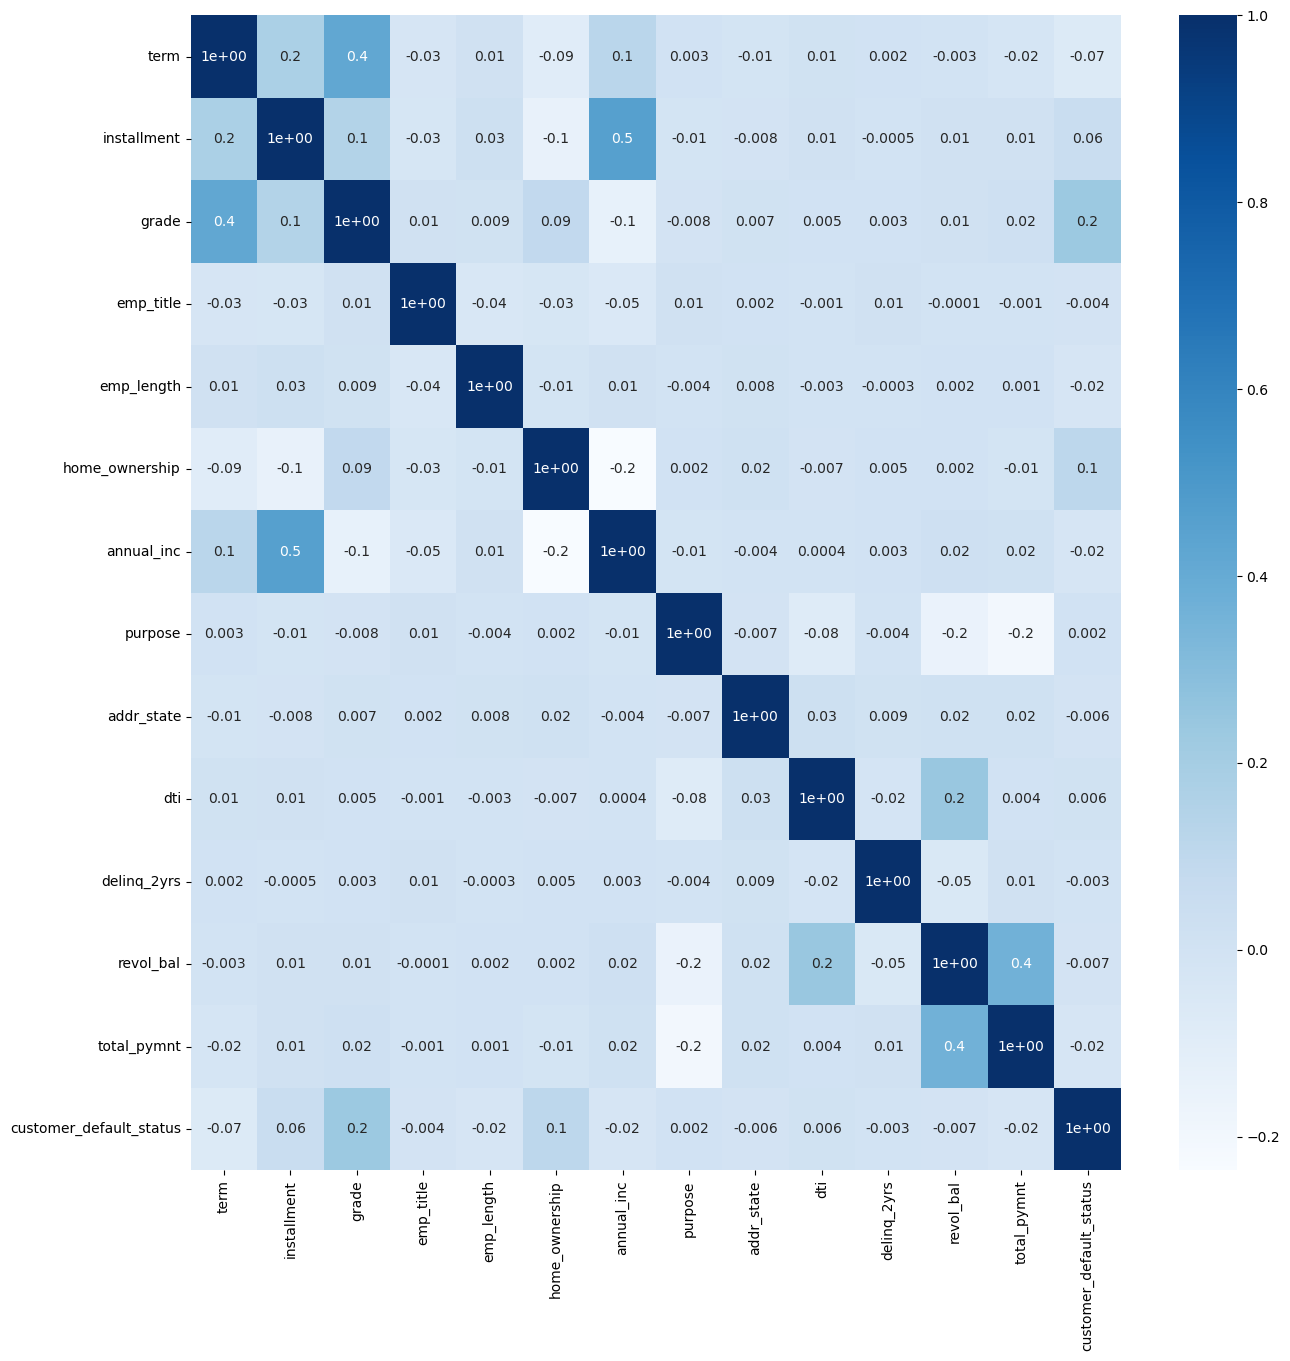

In [74]:
# Pearson plot the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(15,15))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()
    
cor_heatmap(cor_pearson)


In [75]:
#Spearman Correlation Table:
cor_spearman = train_f.corr(method ='spearman')
cor_spearman

,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,customer_default_status
term,1.000000,0.234154,0.399903,-0.027994,0.002313,-0.094759,0.144767,0.002738,-0.010505,0.009003,-0.004248,-0.000782,-0.019900,-0.067332
installment,0.234154,1.000000,0.130017,-0.037514,0.022146,-0.146144,0.458919,-0.007898,-0.007363,0.010197,-0.003837,0.010982,0.005437,0.019515
grade,0.399903,0.130017,1.000000,0.011226,0.005542,0.097716,-0.146465,-0.016093,0.004545,0.005302,-0.000425,0.013605,0.027124,0.238609
emp_title,-0.027994,-0.037514,0.011226,1.000000,-0.039884,-0.031810,-0.062088,0.013447,0.000862,-0.000867,0.013440,-0.003333,-0.007783,-0.004197
emp_length,0.002313,0.022146,0.005542,-0.039884,1.000000,-0.004674,0.015302,-0.004809,0.009696,-0.004029,-0.001366,0.001188,0.003716,-0.031036
home_ownership,-0.094759,-0.146144,0.097716,-0.031810,-0.004674,1.000000,-0.256442,-0.003185,0.018415,-0.008281,0.005546,-0.002808,-0.013171,0.111014
annual_inc,0.144767,0.458919,-0.146465,-0.062088,0.015302,-0.256442,1.000000,-0.004194,-0.004566,0.004393,-0.005142,0.015476,0.015323,-0.053932
purpose,0.002738,-0.007898,-0.016093,0.013447,-0.004809,-0.003185,-0.004194,1.000000,-0.007761,-0.078902,0.016018,-0.208953,-0.204139,0.002860
addr_state,-0.010505,-0.007363,0.004545,0.000862,0.009696,0.018415,-0.004566,-0.007761,1.000000,0.028045,0.008850,0.017711,0.018701,-0.005264
dti,0.009003,0.010197,0.005302,-0.000867,-0.004029,-0.008281,0.004393,-0.078902,0.028045,1.000000,-0.020598,0.277478,0.009762,0.005971


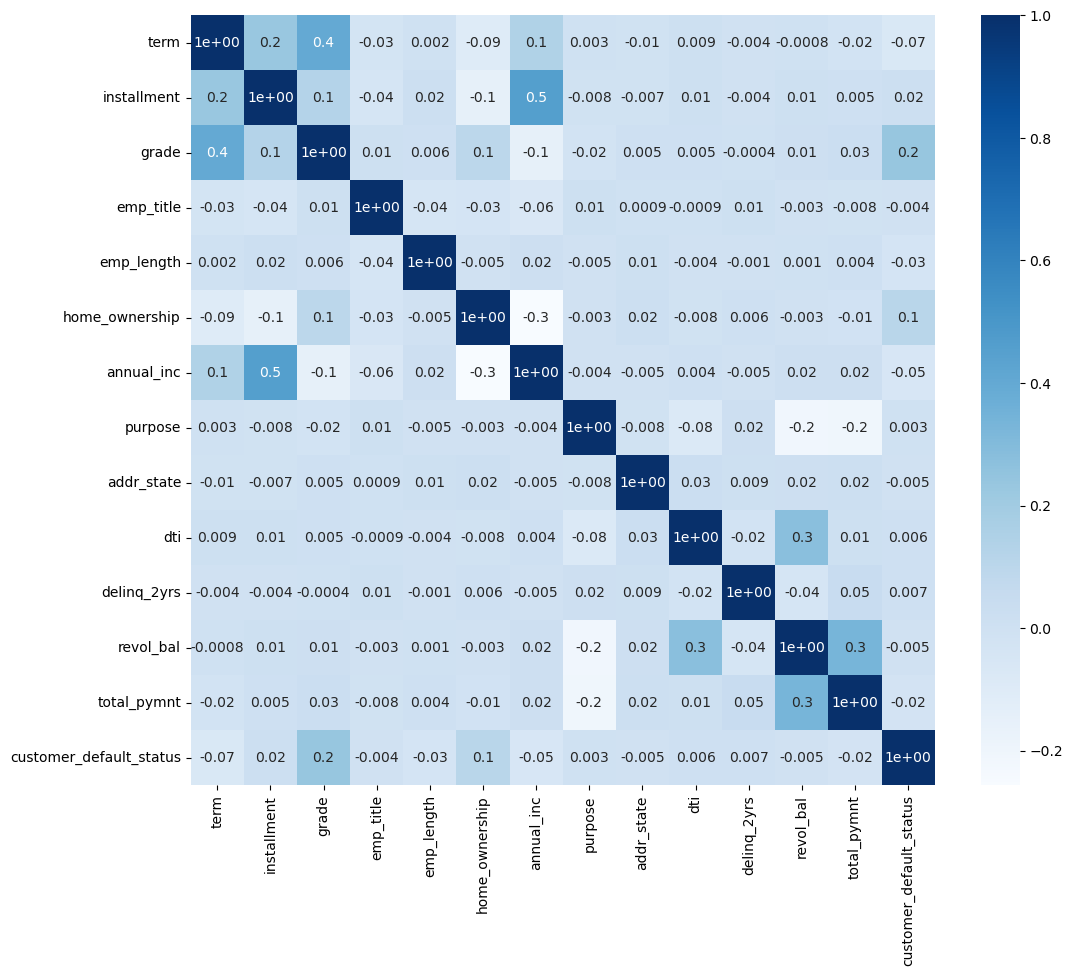

In [76]:
# Spearman plot the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()
    
cor_heatmap(cor_spearman)

#### 4.3 ANOVA Test.

In [77]:
#ANOVA

#This test, will explain us which independent variables are more relevant or significant for prediciton on relationship with
#the target variable, according the k that we will select.

#Assining the data
A_data = train_f.drop('customer_default_status', axis = 1)
A_target = train_f['customer_default_status']

#Implementing the ANOVA
anova = SelectKBest(f_classif, k=6)

#Fitting 
X_anova = anova.fit_transform(A_data, A_target)

#Results
selected_features = pd.Series(anova.get_support(), index = A_data.columns)
selected_features

#So, we can conclude the Installment, grade, verification_status, dti, delin_2yrs, and total_pymnt are the most important 
# 6 variables that explain our target variable.

term               True
installment        True
grade              True
emp_title         False
emp_length         True
home_ownership     True
annual_inc        False
purpose           False
addr_state        False
dti               False
delinq_2yrs       False
revol_bal         False
total_pymnt        True
dtype: bool

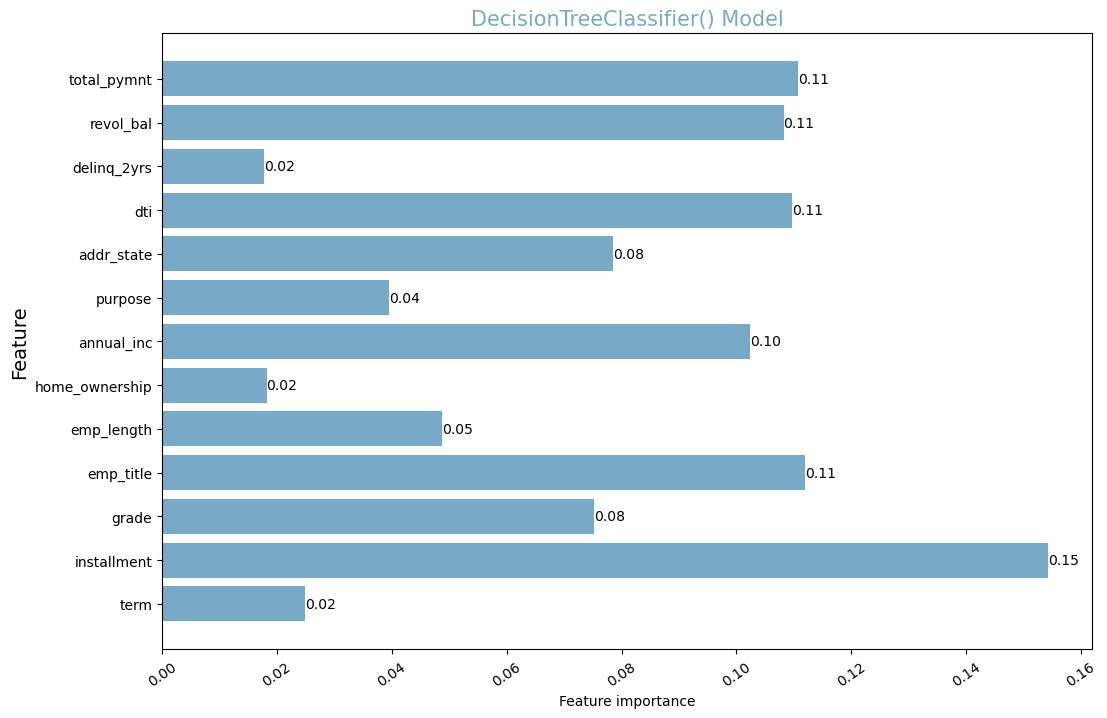

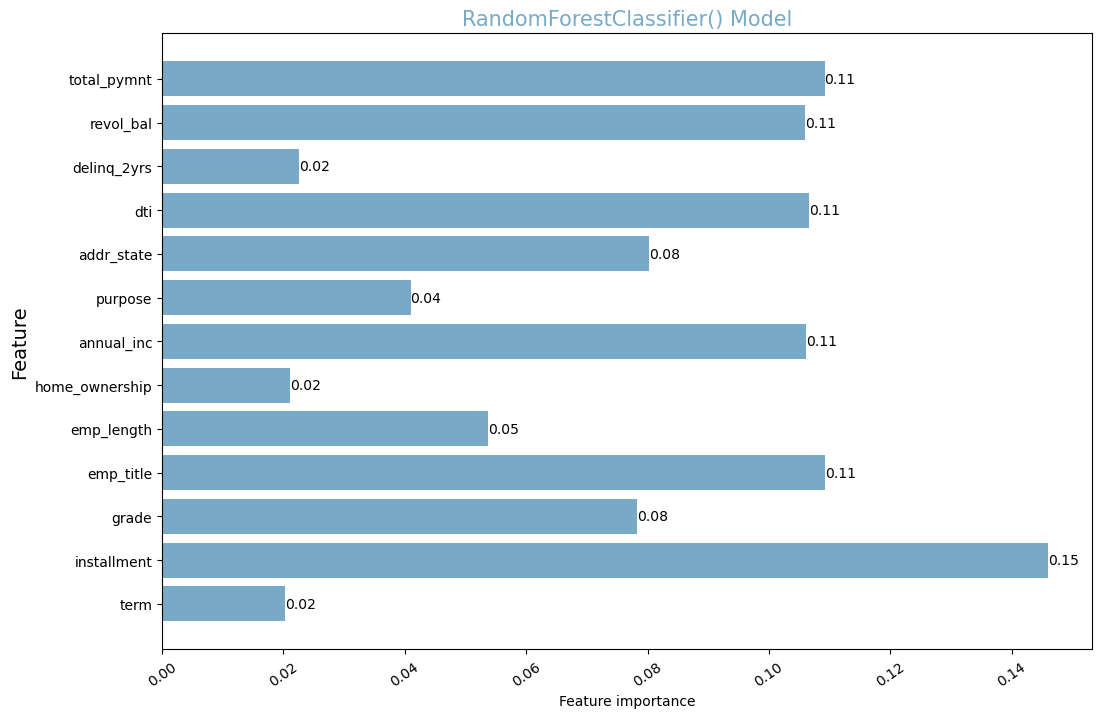

In [78]:
#Understand how important each variable it is using the Decision Tree and Random Forest:

#feature importance plots for the variables (features) in the dataset concerning their significance or importance
#in predicting the target variable ('loan_status' in this case) using two machine learning models: Decision Tree and
#Random Forest.

# Assuming train_f contains your dataset

# Assigning the data
DT_data = train_f.drop('customer_default_status', axis=1)
DT_target = train_f['customer_default_status'].copy()

# Creating models and fitting the models
# Decision Tree
DT_sel = DecisionTreeClassifier()
DT_sel.fit(DT_data, DT_target)

# Random Forest
F_sel = RandomForestClassifier()
F_sel.fit(DT_data, DT_target)

# Plot to see the most important features for this model
def plot_feature_importances(model, data_columns):
    n_features = len(data_columns)
    plt.figure(figsize=(12, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='#78AAC8')
    plt.yticks(np.arange(n_features), data_columns) # Sets y-axis ticks as feature names.
    plt.title(str(model) + " Model", color='#78AAC8', size=15)
    plt.xlabel('Feature importance', loc='center')
    plt.ylabel('Feature', loc='center', size=14)
    plt.xticks(rotation=35)

    for i, v in enumerate(model.feature_importances_):
        plt.text(v, i, f'{v:.2f}', color='black', va='center')

    plt.show()

# Decision Tree
plot_feature_importances(DT_sel, DT_data.columns)

# Random Forest
plot_feature_importances(F_sel, DT_data.columns)

In [79]:
# We do not have a very small value, regarding the other variables. So, we will keep this variables.

<a class="anchor" id="Models">   

    
 # 5. Data Test & Train & Validation


</a>

- 5.1 Creation and Treating the Train & Test & Validation . <br>

#### 5.1 Creation and Treating the Train & Test & Validation.

In [80]:
# make a copy of dataset to keep the source untouched
# for this, we use the "values" attribute to transform a Pandas DataFrame to a NumPy array.
raw_csv_data = train_f.values

# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = train_f.drop('customer_default_status', axis = 1) # Means all columns less the target.


# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = train_f['customer_default_status'] # Only the target Column.

# We have extracted the inputs and the targets.

# Count how many targets are 1 (meaning that the number of defaulted customers)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not default)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []
# For now, it is empty. But we want it to be a list or a tuple. So we put empty brackets.

# let´s balance the dataset
# Count the number of targets that are 0.
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):   # the targets_all.shape[0] means basically the leangth of vector and will show us the number of all targets
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)  # I'll use the append method, which simply adds an element to a list.
# So if the counter for zeros is greater than the number of ones, all indices to be removed will be in the list.
# this will give us all targets we won't need.

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)
# All right. We have a balance data set.
# But the inputs are currently unscaled.
# And note that standardizing them will greatly improve the algorithm.

# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs.
# At the end of this case, you can try to run the algorithm WITHOUT this line of code.
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

# preprocessing.scale is a method that standardize an array.
# remember, that´s the preprocessing library we imported from sklearn

# When the data was collected it was actually arranged by date
# or it could have an order based on some specific charecterstics of customers like location
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible.
# why?
# if the data has time dependency and it is ordered, each batch represents approximately
# a different day delivering loans. The effect of time and ordering the data make data in each batch homogeneous.
# But, between batches, it will be very heterogeneous, due to promotions, day of the week effects, and so on.
# This will confuse the stochastic gradient descent when the average across batches.

shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code,
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

# Save the three datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!

np.savez('loan_data_train', inputs=train_inputs, targets=train_targets)
np.savez('loan_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('loan_data_test', inputs=test_inputs, targets=test_targets)

11136 16480 0.6757281553398058
1392 2060 0.6757281553398058
1409 2060 0.6839805825242719


<a class="anchor" id="Models">   

    
 # 6. Modelling Assessment


</a>

- 6.1 Logistic Regression Model. <br>
- 6.2 Random Forest Model. <br>
- 6.3 Gradient Boosting Classifier (GBM). <br>
- 6.4. Naive Bayes Algorithm. <br>

### 6.1 Logistic Regression Model.

In [81]:
#Creating the Logistic Regression model and Fitting the model
log_reg = LogisticRegression()
log_reg.fit(train_inputs, train_targets)

#Getting the predictions
labels_train_lr = log_reg.predict(train_inputs)
labels_val_lr = log_reg.predict(validation_inputs)

#Predictions Probabilities
log_reg.predict_proba(validation_inputs)

#Imports Needed to make the evaluations
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_train_lr))


print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_val_lr))


print('--------------------- RESULTS ---------------------')
print('Train:', f1_score(train_targets, labels_train_lr))
print('Validation:', f1_score(validation_targets, labels_val_lr))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.59      0.26      0.36      5344
           1       0.72      0.91      0.81     11136

    accuracy                           0.70     16480
   macro avg       0.66      0.59      0.58     16480
weighted avg       0.68      0.70      0.66     16480

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       668
           1       0.72      0.92      0.81      1392

    accuracy                           0.70      2060
   macro avg       0.66      0.59      0.58      2060
weighted avg       0.68      0.70      0.66      2060

--------------------- RESULTS ---------------------
Train: 0.8058413804020896
Validation: 0.8059418457648546


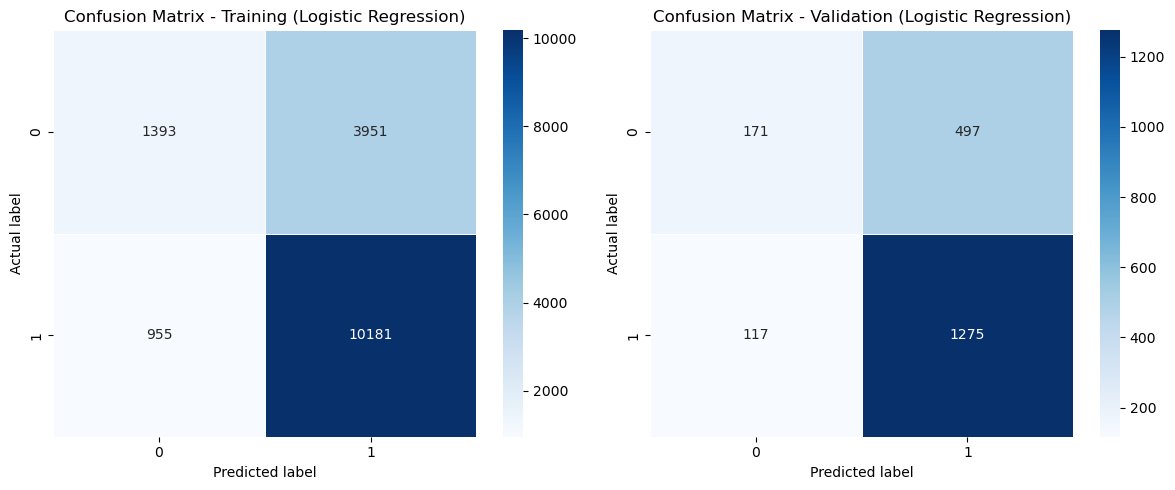

In [82]:
#Calculate Confusion Matrices Logistic Regression:

# Calculate confusion matrices for training and validation sets
cm_train = confusion_matrix(train_targets, labels_train_lr)
cm_val = confusion_matrix(validation_targets, labels_val_lr)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_train, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Logistic Regression)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_val, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Logistic Regression)', size=12)

plt.tight_layout()
plt.show()


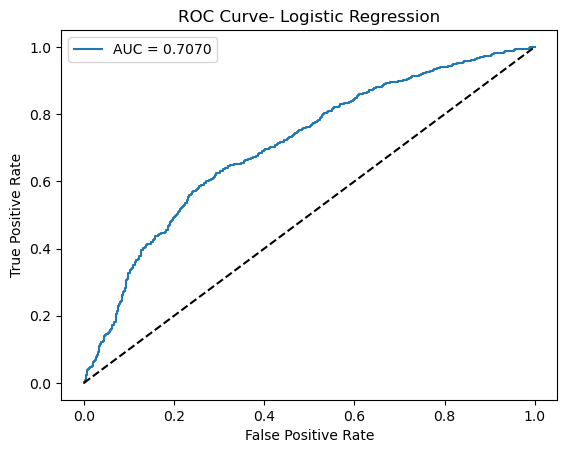

In [83]:
#Calculate Roc Curve Logistic Regression:

# Getting predicted probabilities for the positive class (class 1)
y_pred_proba = log_reg.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
#False Positive Rates (FPR),True Positive Rates (TPR), thresholds determine the classification of samples as positive
#or negative.
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba) 

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba) #AUC represents the area under the ROC curve.

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Regression')
plt.legend()
plt.show()

### 6.2 Random Forest Model.

In [84]:
#Create Random Forest Classifier model and fitting the model
modelclf=RandomForestClassifier(n_estimators=50)
modelclf.fit(train_inputs,train_targets)

#Information About Random Forest
print('The defined Random Forest have: ' + str(modelclf.get_params()))

#Getting the predictions
labels_rf_tr = modelclf.predict(train_inputs)
labels_rf_val = modelclf.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_rf_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_rf_val))


print('--------------------- RESULTS ---------------------')
print('Train:', modelclf.score(train_inputs, train_targets))
print('Validation:', modelclf.score(validation_inputs, validation_targets))


The defined Random Forest have: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5344
           1       1.00      1.00      1.00     11136

    accuracy                           1.00     16480
   macro avg       1.00      1.00      1.00     16480
weighted avg       1.00      1.00      1.00     16480

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.56      0.35      0.43       668
           1       0.74      0.

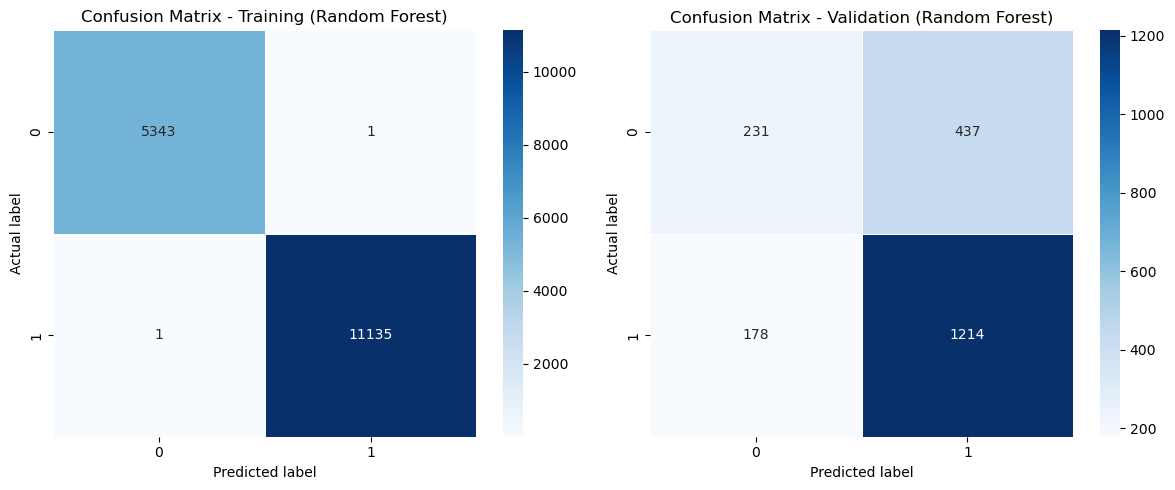

In [85]:
#Calculate Confusion Matrices Random Forest:

# Calculate confusion matrices for training and validation sets
cm_rf_train = confusion_matrix(train_targets, labels_rf_tr)
cm_rf_val = confusion_matrix(validation_targets, labels_rf_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_rf_train, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Random Forest)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_rf_val, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Random Forest)', size=12)

plt.tight_layout()
plt.show()

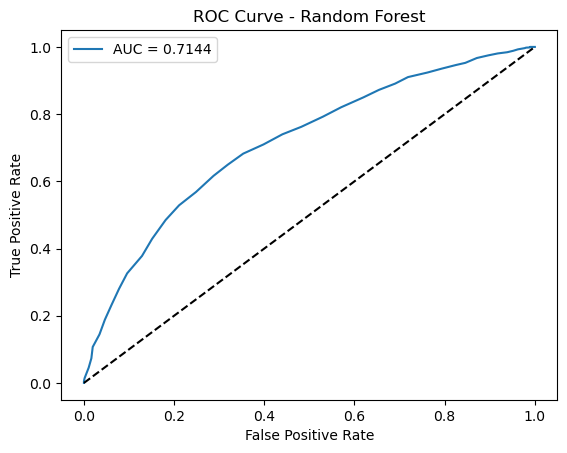

In [86]:
#Calculate Roc Curve Random Forest:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = modelclf.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


In [2]:
# Load the training data
train_data = np.load('loan_data_train.npz')
train_inputs = train_data['inputs']
train_targets = train_data['targets']

# Load the validation data
validation_data = np.load('loan_data_validation.npz')
validation_inputs = validation_data['inputs']
validation_targets = validation_data['targets']

# Load the test data
test_data = np.load('loan_data_test.npz')
test_inputs = test_data['inputs']
test_targets = test_data['targets']

In [5]:
#Imports Needed to make the evaluations
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix#Create Random Forest Classifier model and fitting the model
modelclf=RandomForestClassifier(n_estimators=50)
modelclf.fit(train_inputs,train_targets)

#Information About Random Forest
print('The defined Random Forest have: ' + str(modelclf.get_params()))

#Getting the predictions
labels_rf_tr = modelclf.predict(train_inputs)
labels_rf_val = modelclf.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_rf_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_rf_val))


print('--------------------- RESULTS ---------------------')
print('Train:', modelclf.score(train_inputs, train_targets))
print('Validation:', modelclf.score(validation_inputs, validation_targets))

The defined Random Forest have: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5344
           1       1.00      1.00      1.00     11136

    accuracy                           1.00     16480
   macro avg       1.00      1.00      1.00     16480
weighted avg       1.00      1.00      1.00     16480

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.56      0.34      0.43       668
           1       0.73      0.

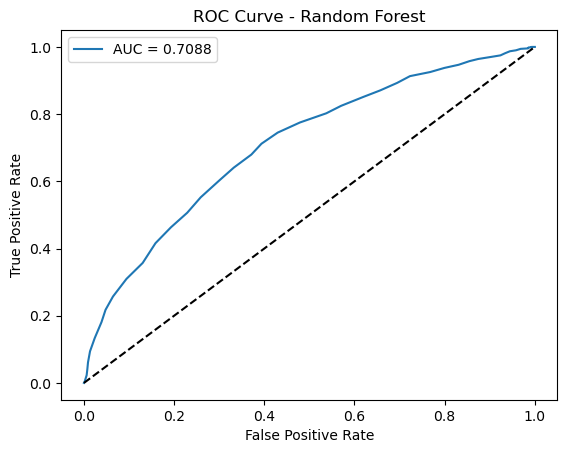

In [6]:
#Calculate Roc Curve Random Forest:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = modelclf.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### 6.3 Gradient Boosting Classifier (GBM).


In [87]:
# Gradient Boosting Model:

# Creating the model and fitting the model
model_gb = GradientBoostingClassifier(n_estimators = 50)
model_gb.fit(train_inputs, train_targets)

#Getting Predictions
labels_gb_tr = model_gb.predict(train_inputs)
labels_gb_val = model_gb.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_gb_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_gb_val))

print('--------------------- RESULTS ---------------------')
print('Train:', model_gb.score(train_inputs, train_targets))
print('Validation:', model_gb.score(validation_inputs, validation_targets))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.64      0.30      0.41      5344
           1       0.73      0.92      0.82     11136

    accuracy                           0.72     16480
   macro avg       0.69      0.61      0.61     16480
weighted avg       0.70      0.72      0.68     16480

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.63      0.27      0.38       668
           1       0.72      0.93      0.81      1392

    accuracy                           0.71      2060
   macro avg       0.68      0.60      0.59      2060
weighted avg       0.70      0.71      0.67      2060

--------------------- RESULTS ---------------------
Train: 0.7185679611650485
Validation: 0.712135922330097


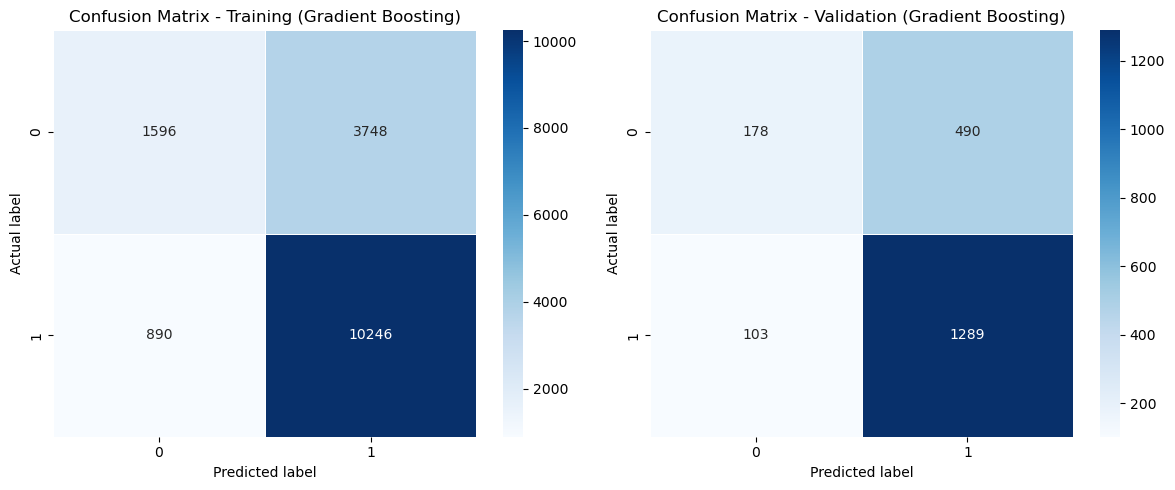

In [88]:
#Calculate Confusion Matrices Gradient Boosting:

# Calculate confusion matrices for training and validation sets
cm_gb_train = confusion_matrix(train_targets, labels_gb_tr)
cm_gb_val = confusion_matrix(validation_targets, labels_gb_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_gb_train, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Gradient Boosting)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_gb_val, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Gradient Boosting)', size=12)

plt.tight_layout()
plt.show()

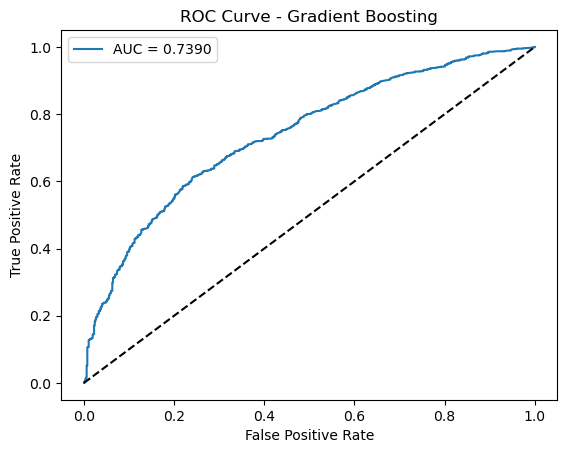

In [89]:
#Calculate Roc Curve Gradient Boosting:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = model_gb.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

### 6.4. Naive Bayes Algorithm.

In [90]:
# Naive Bayes Model:

# Creating the model and fitting the model
model_ba = GaussianNB()
model_ba.fit(train_inputs, train_targets)

#Getting Predictions
labels_ba_tr = model_ba.predict(train_inputs)
labels_ba_val = model_ba.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_ba_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_ba_val))


print('--------------------- RESULTS ---------------------')
print('Train:', model_ba.score(train_inputs, train_targets))
print('Validation:', model_ba.score(validation_inputs, validation_targets))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.58      0.25      0.35      5344
           1       0.72      0.91      0.80     11136

    accuracy                           0.70     16480
   macro avg       0.65      0.58      0.58     16480
weighted avg       0.67      0.70      0.66     16480

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.56      0.24      0.34       668
           1       0.71      0.91      0.80      1392

    accuracy                           0.69      2060
   macro avg       0.64      0.58      0.57      2060
weighted avg       0.66      0.69      0.65      2060

--------------------- RESULTS ---------------------
Train: 0.6972087378640777
Validation: 0.691747572815534


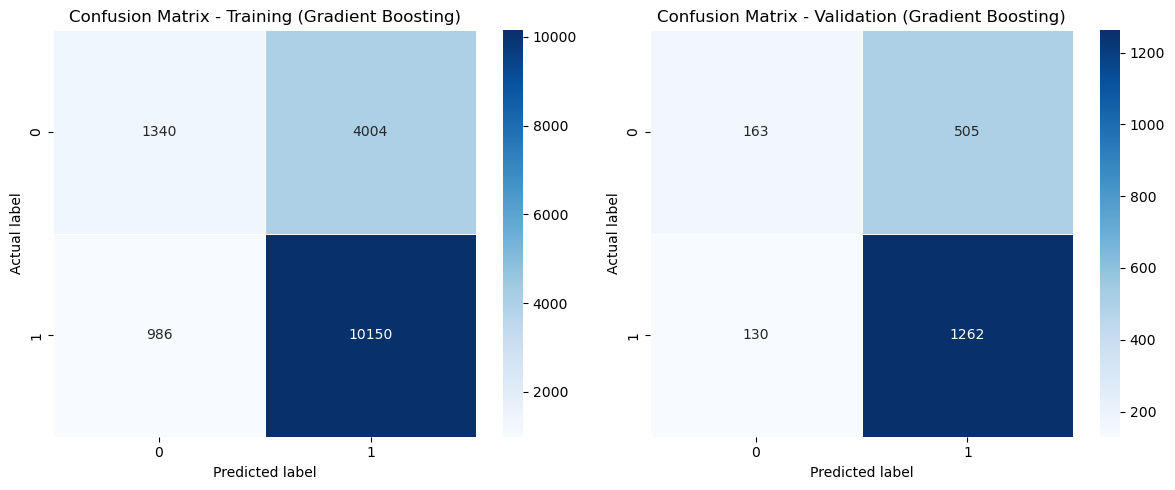

In [91]:
#Calculate Confusion Matrices Naive Bayes:

# Calculate confusion matrices for training and validation sets
cm_ba_train = confusion_matrix(train_targets, labels_ba_tr)
cm_ba_val = confusion_matrix(validation_targets, labels_ba_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_ba_train, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Gradient Boosting)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_ba_val, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Gradient Boosting)', size=12)

plt.tight_layout()
plt.show()

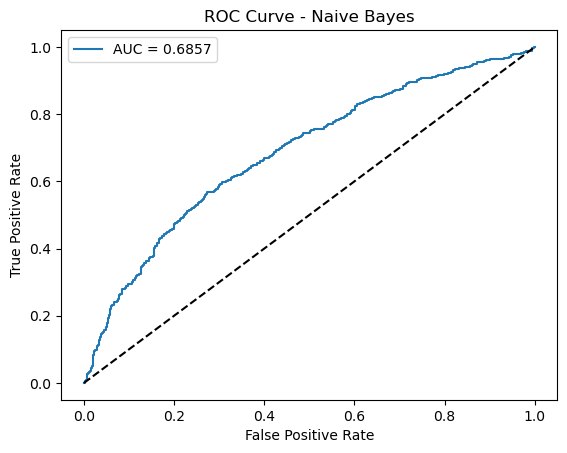

In [92]:
#Calculate Roc Curve Naive Bayes:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = model_ba.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

<a class="anchor" id="Models">   

    
 # 7. Deep Model


</a>


In [93]:

# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('loan_data_train.npz')

# remember that we save the NPZs in 2 tuple form comprising "inputs" and "targets".
# Let's start from the inputs and extract them into a new variable called train inputs.
# we must ensure that inputs are all floats, let's also take care of that by .astype(np.float)
train_inputs = npz['inputs'].astype(np.float64)

# we can do the same for targets which are zero and one.
# But we are not sure that their data type is integer, float or boolean!
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(int)

# we load the validation data in the temporary variable
npz = np.load('loan_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# we load the test data in the temporary variable
npz = np.load('loan_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# Set the input and output sizes
input_size = 14
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function, 'sparse_categorical_crossentropy'
# We use this loss to ensure that our integer Targets are one hot encoded appropriately when calculating loss.
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training
# That's where we train the model we have built.

# Two hyperparameters:
# (1) set the batch size
batch_size = 100

# (2) set a maximum number of training epochs
max_epochs = 100

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
165/165 - 2s - loss: 0.5973 - accuracy: 0.6794 - val_loss: 0.5734 - val_accuracy: 0.6985 - 2s/epoch - 10ms/step
Epoch 2/100
165/165 - 0s - loss: 0.5649 - accuracy: 0.7042 - val_loss: 0.5673 - val_accuracy: 0.7029 - 281ms/epoch - 2ms/step
Epoch 3/100
165/165 - 0s - loss: 0.5589 - accuracy: 0.7141 - val_loss: 0.5647 - val_accuracy: 0.7010 - 293ms/epoch - 2ms/step
Epoch 4/100
165/165 - 0s - loss: 0.5549 - accuracy: 0.7171 - val_loss: 0.5661 - val_accuracy: 0.7063 - 290ms/epoch - 2ms/step
Epoch 5/100
165/165 - 0s - loss: 0.5522 - accuracy: 0.7175 - val_loss: 0.5640 - val_accuracy: 0.7049 - 297ms/epoch - 2ms/step
Epoch 6/100
165/165 - 0s - loss: 0.5502 - accuracy: 0.7191 - val_loss: 0.5640 - val_accuracy: 0.7073 - 288ms/epoch - 2ms/step
Epoch 7/100
165/165 - 0s - loss: 0.5486 - accuracy: 0.7208 - val_loss: 0.5635 - val_accuracy: 0.7044 - 278ms/epoch - 2ms/step
Epoch 8/100
165/165 - 0s - loss: 0.5462 - accuracy: 0.7231 - val_loss: 0.5668 - val_accuracy: 0.7015 - 283ms/epoch - 2ms

Epoch 66/100
165/165 - 0s - loss: 0.4858 - accuracy: 0.7606 - val_loss: 0.6108 - val_accuracy: 0.6816 - 276ms/epoch - 2ms/step
Epoch 67/100
165/165 - 0s - loss: 0.4856 - accuracy: 0.7613 - val_loss: 0.6099 - val_accuracy: 0.6767 - 282ms/epoch - 2ms/step
Epoch 68/100
165/165 - 0s - loss: 0.4861 - accuracy: 0.7615 - val_loss: 0.6111 - val_accuracy: 0.6762 - 282ms/epoch - 2ms/step
Epoch 69/100
165/165 - 0s - loss: 0.4843 - accuracy: 0.7638 - val_loss: 0.6193 - val_accuracy: 0.6883 - 310ms/epoch - 2ms/step
Epoch 70/100
165/165 - 0s - loss: 0.4830 - accuracy: 0.7640 - val_loss: 0.6220 - val_accuracy: 0.6733 - 283ms/epoch - 2ms/step
Epoch 71/100
165/165 - 0s - loss: 0.4840 - accuracy: 0.7637 - val_loss: 0.6285 - val_accuracy: 0.6927 - 292ms/epoch - 2ms/step
Epoch 72/100
165/165 - 0s - loss: 0.4824 - accuracy: 0.7620 - val_loss: 0.6253 - val_accuracy: 0.6680 - 273ms/epoch - 2ms/step
Epoch 73/100
165/165 - 0s - loss: 0.4836 - accuracy: 0.7616 - val_loss: 0.6197 - val_accuracy: 0.6782 - 273ms/e

In [94]:
# Set the input and output sizes
input_size = 14
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function, 'sparse_categorical_crossentropy'
# We use this loss to ensure that our integer Targets are one hot encoded appropriately when calculating loss.
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training
# That's where we train the model we have built.

# Two hyperparameters:
# (1) set the batch size
batch_size = 100

# (2) set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )


Epoch 1/100
165/165 - 1s - loss: 0.5927 - accuracy: 0.6828 - val_loss: 0.5715 - val_accuracy: 0.7015 - 1s/epoch - 8ms/step
Epoch 2/100
165/165 - 0s - loss: 0.5646 - accuracy: 0.7064 - val_loss: 0.5667 - val_accuracy: 0.6990 - 287ms/epoch - 2ms/step
Epoch 3/100
165/165 - 0s - loss: 0.5592 - accuracy: 0.7121 - val_loss: 0.5613 - val_accuracy: 0.7063 - 296ms/epoch - 2ms/step
Epoch 4/100
165/165 - 0s - loss: 0.5548 - accuracy: 0.7154 - val_loss: 0.5659 - val_accuracy: 0.7024 - 301ms/epoch - 2ms/step
Epoch 5/100
165/165 - 0s - loss: 0.5525 - accuracy: 0.7170 - val_loss: 0.5635 - val_accuracy: 0.7029 - 272ms/epoch - 2ms/step


In [95]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

65/65 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7150

Test loss: 0.57. Test accuracy: 71.50%
